# Deep Learning y Machine Learning

En esta ocasión trabajaremos con dos bases de datos. La primera de ellas corresponde a textos de noticias clasificadas como Verdaderas o Falsas; y partir de la información que tenemos de ellas entrenaremos un modelo de red neuronal recurrente que permita clasificarlas noticias como tales. La segunda base de datos posee información de artículos compartidos por la compañía de informaciones Mashable en un periodo de dos años, para la que tenemos múltiples características que describen los textos junto con la cantidad de veces que cada uno de estos artículos fue compartido. Nuestra misión respecto de esta segunda base de datos será entrenar múltiples modelos para predecir la cantidad de veces que una noticia se compartirá. Las variables presentes en esta base de datos son:

- url: URL del artículo
- timedelta: Días transcurridos entre la publicación del artículo y la adquisición del conjunto de datos
- n_tokens_title: Número de palabras del título
- n_tokens_content: Número de palabras del contenido
- n_unique_tokens: Tasa de palabras únicas en el contenido
- n_non_stop_words: Tasa de palabras que no se detienen en el contenido
- n_non_stop_unique_tokens: Tasa de palabras únicas sin parada en el contenido
- num_hrefs: Número de enlaces
- num_self_hrefs: Número de enlaces a otros artículos publicados por Mashable
- num_imgs: Número de imágenes
- num_videos: Número de vídeos
- average_token_length: Longitud media de las palabras del contenido
- num_keywords: Número de palabras clave en los metadatos
- data_channel_is_lifestyle: ¿Es el canal de datos 'Estilo de vida'?
- data_channel_is_entertainment: ¿Es el canal de datos 'Entretenimiento'?
- data_channel_is_bus: ¿Es el canal de datos 'Business'?
- data_channel_is_socmed: ¿Es el canal de datos 'Social Media'?
- data_channel_is_tech: ¿Es el canal de datos 'Tech'?
- data_channel_is_world: ¿Es el canal de datos 'Mundo'?
- kw_min_min: Peor palabra clave (cuotas mín.)
- kw_max_min: Peor palabra clave (participaciones máx.)
- kw_avg_min: Peor palabra clave (acciones medias)
- kw_min_max: Mejor palabra clave (acciones mín.)
- kw_max_max: Mejor palabra clave (acciones máx.)
- kw_avg_max: Mejor palabra clave (acciones medias)
- kw_min_avg: Palabra clave media (participaciones mínimas)
- kw_max_avg: Palabra clave media (participaciones máx.)
- kw_avg_avg: Palabra clave media (acciones medias)
- self_reference_min_shares: Cuotas mínimas de los artículos referenciados en Mashable
- self_reference_max_shares: Máx. de shares de artículos referenciados en Mashable.
- self_reference_avg_sharess: Acciones medias de artículos referenciados en Mashable.
- weekday_is_monday: ¿El artículo se publicó un lunes?
- weekday_is_tuesday: ¿El artículo se publicó un martes?
- weekday_is_wednesday: ¿El artículo se publicó un miércoles?
- weekday_is_thursday: ¿El artículo se publicó un jueves?
- weekday_is_friday: ¿El artículo se publicó un viernes?
- weekday_is_saturday: ¿El artículo se publicó un sábado?
- weekday_is_sunday: ¿El artículo se publicó un domingo?
- is_weekend: ¿El artículo se publicó en fin de semana?
- LDA_00: Cercanía al tema 0 del LDA
- LDA_01: Cercanía al tema 1 del LDA
- LDA_02: Cercanía al tema 2 del LDA
- LDA_03: Cercanía al tema 3 del LDA
- LDA_04: Cercanía al tema 4 del LDA
- global_subjectivity: Subjetividad del texto
- global_sentiment_polarity: Polaridad del sentimiento del texto
- global_rate_positive_words: Tasa de palabras positivas en el contenido
- global_rate_negative_words: Tasa de palabras negativas en el contenido
- rate_positive_words: Tasa de palabras positivas entre los tokens no neutrales
- rate_negative_words: Tasa de palabras negativas entre los tokens no neutrales
- avg_positive_polarity: Polaridad media de las palabras positivas
- min_positive_polarity: Polaridad mínima de las palabras positivas
- max_positive_polarity: Polaridad máxima de las palabras positivas
- avg_negative_polarity: Polaridad media de las palabras negativas
- min_negative_polarity: Polaridad mínima de las palabras negativas
- max_negative_polarity: Polaridad máxima de las palabras negativas
- title_subjectivity: Subjetividad del título
- title_sentiment_polarity: Polaridad del título
- abs_title_subjectivity: Nivel absoluto de subjetividad
- abs_title_sentiment_polarity: Nivel de polaridad absoluta
- shares: Número de veces en que se compartio el artículo (objetivo)

## Actividad 1

Carga la base de datos news1.csv y realiza un conteo por clase (columna label). Divide el conjunto de datos en entrenamiento y test (33%) y realiza una exploración de frecuencias de palabras.

In [273]:
# Bibliotecas Comunes
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.base import clone

#Metricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.metrics import classification_report

# Evaluacion de Modelos y Seleccion de Features
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

# Modelos
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input, BatchNormalization, Embedding, LSTM
from keras.optimizers import Adam, SGD
from keras.initializers import glorot_normal, glorot_uniform
from keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec

print(f"Version de TensorFlow: {tf.__version__}")
print(f"Version de Keras: {keras.__version__}")

Version de TensorFlow: 2.20.0
Version de Keras: 3.11.3


In [3]:
# Importando el Dataset
df = pd.read_csv("news1.csv", delimiter=",", encoding="utf-8", header=0)
df

Unnamed: 0.1 Unnamed: 0  \
0               0       8476   
1               1      10294   
2               2       3608   
3               3      10142   
4               4        875   
...           ...        ...   
6372         3257       4700   
6373         3258       2676   
6374         3259       5216   
6375         3260       9802   
6376         3261        720   

                                                  title  \
0                          You Can Smell Hillary’s Fear   
1     Watch The Exact Moment Paul Ryan Committed Pol...   
2           Kerry to go to Paris in gesture of sympathy   
3     Bernie supporters on Twitter erupt in anger ag...   
4      The Battle of New York: Why This Primary Matters   
...                                                 ...   
6372   What WikiLeaks hack says about Clinton: Our view   
6373  Providing Balanced Information Is Not Facebook...   
6374  Which States Can Gary Johnson and Jill Stein S...   
6375                                 On Trump’s victory   
6376  Trump Hits 'Magic Number' of Delegates Require...   

                                                   text label  
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1     Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2     U.S. Secretary of State John F. Kerry said Mon...  REAL  
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4     It's primary day in New York and front-runners...  REAL  
...                                                 ...   ...  
6372  Now we know why she didn't want those Wall Str...  REAL  
6373  Catherine R. Squires is a professor of communi...  REAL  
6374  Like his third-party forefathers, Gary Johnson...  REAL  
6375    Gilad Atzmon \nIt occurred to me in recent y...  FAKE  
6376  Presumptive Republican nominee Donald Trump ha...  REAL  

[6377 rows x 5 columns]

In [4]:
# Importando el Dataset
df_pred = pd.read_csv("news_pred.csv", delimiter=",", encoding="utf-8", header=0)
df_pred

title  \
0  At least 12 dead after terror attack at Paris ...   
1  World leaders' personal chefs sample Indian ma...   
2  An Open Letter to Black South African Police O...   
3  Gay man finds it in himself to tolerate religi...   
4  US Spy Chief: Asking North Korea To Stop Nuke ...   
5  The Devastating Consequences Of A 'Small' Rise...   
6  Cost, logistics of Obama immigration plan rais...   

                                                text label  
0  Gunmen stormed the offices of the satirical ne...  REAL  
1  World leaders' personal chefs sample Indian ma...  FAKE  
2  Tweet Widget by Black Power Front \nWith stude...  FAKE  
3  Gay man finds it in himself to tolerate religi...  FAKE  
4  Get short URL 0 27 0 0 On Tuesday, National In...  FAKE  
5  More Floods, More Drought Inevitable. How Bad ...  REAL  
6  President Obama’s executive action sparing mil...  REAL

In [5]:
# Valores Nulos
missing_values=df.apply(lambda x: sum(x.isnull()),axis=0)
print(missing_values)

Unnamed: 0.1     0
Unnamed: 0       4
title           13
text            62
label           33
dtype: int64


In [6]:
# Valores Nulos
missing_values=df_pred.apply(lambda x: sum(x.isnull()),axis=0)
print(missing_values)

title    0
text     0
label    0
dtype: int64


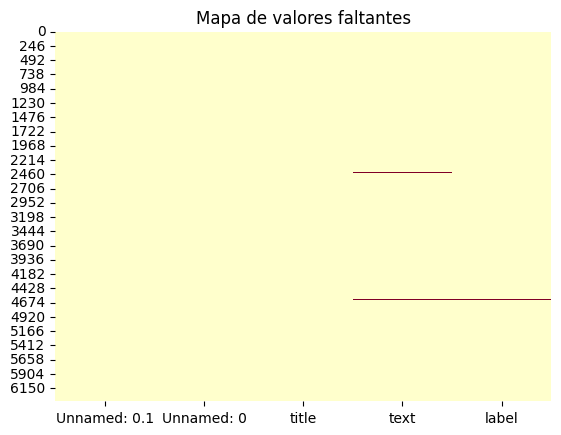

In [7]:
# Mapa de valores faltantes
sns.heatmap(df.isnull(), cbar=False, cmap="YlOrRd")
plt.title("Mapa de valores faltantes")
plt.show()

In [8]:
def df_news_formated(df:pd.DataFrame, columns_delete_list:list[str]) -> pd.DataFrame:

    df_ = df.copy()

    # Descartando Columnas
    df_ = df_.drop(columns_delete_list, axis=1)
    # Mascara valores validos
    mask_valid = df.notna().all(axis=1)
    df_ = df_[mask_valid]
    # Convirtiendo labels a numericos
    df_["label_numeric"] = df_["label"].apply(lambda x: 1 if x == "REAL" else 0)
    # Unificar titulo y texto
    df_['doc'] = df_['title'].fillna("") + " " + df_['text'].fillna("")
    # Borrando columnas
    df_ = df_.drop(["title", "text", "label"], axis=1)
    df_ = df_.reset_index(drop=True)

    return df_

In [9]:
df_formated = df_news_formated(df, ["Unnamed: 0.1", "Unnamed: 0"])
df_formated

label_numeric                                                doc
0                 0  You Can Smell Hillary’s Fear Daniel Greenfield...
1                 0  Watch The Exact Moment Paul Ryan Committed Pol...
2                 1  Kerry to go to Paris in gesture of sympathy U....
3                 0  Bernie supporters on Twitter erupt in anger ag...
4                 1  The Battle of New York: Why This Primary Matte...
...             ...                                                ...
6302              1  What WikiLeaks hack says about Clinton: Our vi...
6303              1  Providing Balanced Information Is Not Facebook...
6304              1  Which States Can Gary Johnson and Jill Stein S...
6305              0  On Trump’s victory   Gilad Atzmon \nIt occurre...
6306              1  Trump Hits 'Magic Number' of Delegates Require...

[6307 rows x 2 columns]

In [10]:
# Tipos de Datos y No Nulos
df_formated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6307 entries, 0 to 6306
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   label_numeric  6307 non-null   int64 
 1   doc            6307 non-null   object
dtypes: int64(1), object(1)
memory usage: 98.7+ KB


In [11]:
df_pred_formated = df_news_formated(df_pred, [])
df_pred_formated

label_numeric                                                doc
0              1  At least 12 dead after terror attack at Paris ...
1              0  World leaders' personal chefs sample Indian ma...
2              0  An Open Letter to Black South African Police O...
3              0  Gay man finds it in himself to tolerate religi...
4              0  US Spy Chief: Asking North Korea To Stop Nuke ...
5              1  The Devastating Consequences Of A 'Small' Rise...
6              1  Cost, logistics of Obama immigration plan rais...

In [12]:
# Conteo de labels

df_formated['label_numeric'].value_counts()

label_numeric
1    3154
0    3153
Name: count, dtype: int64

In [13]:
# Del conteo anterior , se puede evidenciar un conteo de clases balanceadas, lo cual facilita el entrenamiento y la división de los datos

In [14]:
X_news = df_formated.drop('label_numeric', axis=1)
y_news = df_formated[['label_numeric']]
X_news_pred = df_pred_formated.drop('label_numeric', axis=1)
y_news_pred = df_pred_formated[['label_numeric']]

In [15]:
# Generar Datos de Entrenamiento y Testeo
X_news_train, X_news_test, y_news_train, y_news_test = train_test_split(X_news, y_news, test_size=0.33, random_state=42)

In [16]:
# Transformando datos a arrays

# Datos Totales
X_news = X_news["doc"].to_numpy()
y_news = y_news["label_numeric"].to_numpy().ravel()

# Datos de entrenamiento
X_news_train = X_news_train["doc"].to_numpy()
y_news_train = y_news_train["label_numeric"].to_numpy().ravel()

# Datos de testeo
X_news_test = X_news_test["doc"].to_numpy()
y_news_test = y_news_test["label_numeric"].to_numpy().ravel()

# Datos de prediccion
X_news_pred = X_news_pred["doc"].to_numpy()
y_news_pred = y_news_pred["label_numeric"].to_numpy().ravel()


## Actividad 2

Para nuestro análisis usaremos un Word Embedding ya entrenado, en particular utilizaremos word2Vec entrenado con corpus Google News con 3 millones de palabras, cada una representada con 300 dimensiones. Para esto, carga Word Embedding de Google. Tokeniza las palabras del conjunto de entrenamiento con un máximo de 80.000 palabras para el vocabulario, y realiza padding para cada secuencia con largo máximo de 80. Finalmente, crea la matriz de embedding usando el Word2Vec pre entrenado.

In [17]:
# Crea un tokenizador
tokenizer = Tokenizer(num_words=80000,
                      filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      lower=True,
                      split=' ',
                      char_level=False,
                      oov_token="<oov>")

tokenizer.fit_on_texts(X_news)

# Convierte las frases en secuencias numéricas
X_news_train_sequences = tokenizer.texts_to_sequences(X_news_train)
X_news_test_sequences = tokenizer.texts_to_sequences(X_news_test)
X_news_pred_sequences = tokenizer.texts_to_sequences(X_news_pred)

In [18]:
# Tamaño del vocabulario
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
vocab_size

74549

In [19]:
# Dimension de secuencias
len_sequences = max(len(X_news_train_sequences[0]), len(X_news_test_sequences[0]), len(X_news_pred_sequences[0]))
len_sequences

677

In [20]:
# longitud maxima de secuencias
max_len_sequences = 80

# Vamos a hacer pad_secuences para hacer padding y truncar
X_news_train_pad_sequences = pad_sequences(X_news_train_sequences, maxlen=max_len_sequences, padding="post", truncating="post")
X_news_test_pad_sequences = pad_sequences(X_news_test_sequences, maxlen=max_len_sequences, padding="post", truncating="post")
X_news_pred_pad_sequences = pad_sequences(X_news_pred_sequences, maxlen=max_len_sequences, padding="post", truncating="post")

print("X_news_train_pad_sequences.shape:", X_news_train_pad_sequences.shape)
print("X_news_test_pad_sequences.shape :", X_news_test_pad_sequences.shape)
print("X_news_pred_pad_sequences.shape :", X_news_pred_pad_sequences.shape)

X_news_train_pad_sequences.shape: (4225, 80)
X_news_test_pad_sequences.shape : (2082, 80)
X_news_pred_pad_sequences.shape : (7, 80)


In [21]:
# Funcion para obtener matriz de embedding

def get_embedding_matrix_word2vec(x_data, tokenizer:Tokenizer, num_words:int, embedding_dim:int):

    tokenized_text = []

    # Tokenizando el texto
    for text in x_data:

        # Convierte a minúsculas
        text = text.lower()
        # Mantiene solo letras y números, reemplazando el resto por espacio
        text = re.sub(r'[^a-zA-Z0-9áéíóúñü]+', ' ', text)
        # Split en palabras
        tokens = text.split()
        # Añadir a tokenized_text
        tokenized_text.append(tokens)

    # Creando modelo Word2Vec
    w2v = Word2Vec(
    sentences=tokenized_text,
    vector_size=embedding_dim,
    window=5,
    min_count=1)

    word2vec_model = w2v.wv

    # Numero de palabras
    n_words = min(num_words, len(tokenizer.word_index)) + 1
    # Creando embedding_matrix
    embedding_matrix = np.zeros((n_words, embedding_dim))

    for word, i in tokenizer.word_index.items():
        if i >= n_words:
            continue

        if word in word2vec_model:
            embedding_matrix[i] = word2vec_model[word]
        else:
            embedding_matrix[i] = np.zeros(embedding_dim)

    return n_words, embedding_matrix



In [22]:
n_words, embedding_matrix = get_embedding_matrix_word2vec(x_data = X_news, tokenizer = tokenizer, num_words = 80000, embedding_dim = 300)

In [23]:
embedding_matrix

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-3.83132279e-01, -1.26954067e+00,  3.89582038e-01, ...,
         1.07967925e+00,  7.78047442e-01, -1.50984693e+00],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.11164484e-03,  1.71707629e-03,  6.08741445e-03, ...,
        -1.50018372e-03,  7.19938613e-03,  5.16840490e-03],
       [ 2.57636351e-03,  1.26465308e-02, -7.19642639e-03, ...,
        -8.36713798e-03,  1.76254078e-03, -7.29708606e-03]],
      shape=(74549, 300))

## Actividad 3

Implementa un modelo de red neuronal recurrente LSTM, con un mínimo de tres capas, empleando regularización Dropout. Considera la capa de Embedding con los pesos pre-entrenados. El modelo debe lograr un accuracy superior al 80% y la cantidad de épocas no debe superar las 20. Muestra las métricas apropiadas para medir el rendimiento del modelo, incluyendo la curva ROC.

In [24]:
# Creamos el modelo

class Model_LSTM_Sequential:

    def __init__(self,
                optimizer_name:str,
                learning_rate:float,
                loss_name:str,
                metrics:list[str],
                emb_add:bool,
                emb_inputdim:int,
                emb_outputdim:int,
                emb_mazkzero:bool,
                emb_inputlength:int,
                emb_weights,
                emb_trainable:bool,
                lstm_inputshape:tuple|None,
                lstm_units_list:list[int],
                lstm_returnsequences_list:list[bool],
                lstm_dropout_list:list[float|None],
                lstm_batchnormalization_list:list[bool],
                dense_neurons_list:list[int],
                dense_activation_list:list[str],
                dense_kernelinitializer_list:list[str],
                dense_biasinitializer_list:list[str],
                dense_dropout_list:list[float|None],
                dense_batchnormalization_list:list[bool]
                 ):

        self.optimizer_name = optimizer_name
        self.learning_rate = learning_rate
        self.loss_name = loss_name
        self.metrics = metrics
        self.emb_add = emb_add
        self.emb_inputdim = emb_inputdim
        self.emb_outputdim = emb_outputdim
        self.emb_mazkzero = emb_mazkzero
        self.emb_inputlength = emb_inputlength
        self.emb_weights = emb_weights
        self.emb_trainable = emb_trainable
        self.lstm_inputshape = lstm_inputshape
        self.lstm_units_list = lstm_units_list
        self.lstm_returnsequences_list = lstm_returnsequences_list
        self.lstm_dropout_list = lstm_dropout_list
        self.lstm_batchnormalization_list = lstm_batchnormalization_list
        self.dense_neurons_list = dense_neurons_list
        self.dense_activation_list = dense_activation_list
        self.dense_kernelinitializer_list = dense_kernelinitializer_list
        self.dense_biasinitializer_list = dense_biasinitializer_list
        self.dense_dropout_list = dense_dropout_list
        self.dense_batchnormalization_list = dense_batchnormalization_list

        # Sequential Model
        self.model = Sequential()

        # Building Model
        self.__model_contructor()


    # Model constructor private method
    def __model_contructor(self):

        # Optimizer
        if self.optimizer_name == "adam":
            optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        else:
            optimizer = tf.keras.optimizers.SGD(learning_rate=self.learning_rate)

        # Loss
        if self.loss_name == "mse":
            loss = tf.keras.losses.MeanSquaredError()
        elif self.loss_name == "mae":
            loss = tf.keras.losses.MeanAbsoluteError()
        elif self.loss_name == "categorical_crossentropy":
            loss = tf.keras.losses.CategoricalCrossentropy()
        elif self.loss_name == "binary_crossentropy":
            loss = tf.keras.losses.BinaryCrossentropy()
        else:
            loss = tf.keras.losses.MeanSquaredError()

        # Input Layer
        self.model.add(Input(shape=(self.emb_inputlength,)))

        # Embedding or Input Layer
        if self.emb_add == True:

            self.model.add(Embedding(input_dim=self.emb_inputdim,
                                    output_dim=self.emb_outputdim,
                                    mask_zero=self.emb_mazkzero,
                                    weights=[self.emb_weights],
                                    trainable=self.emb_trainable ))
        else:

            self.model.add(Input(shape=self.lstm_inputshape))

        # LSTM Layers
        for i in range(len(self.lstm_units_list)):

            # Lstm Layer
            self.model.add(LSTM(units=self.lstm_units_list[i], return_sequences=self.lstm_returnsequences_list[i]))

            # BatchNormalization
            if self.lstm_batchnormalization_list[i] == True:
                self.model.add(BatchNormalization())

            # Dropout
            if isinstance(self.lstm_dropout_list[i], float):
                self.model.add(Dropout(rate=self.lstm_dropout_list[i]))

        # Dense Layers
        for i in range(len(self.dense_neurons_list)):

            # Dense Layer
            self.model.add(Dense(units=self.dense_neurons_list[i],
                                activation=self.dense_activation_list[i],
                                kernel_initializer=self.dense_kernelinitializer_list[i],
                                bias_initializer=self.dense_biasinitializer_list[i]))

            # BatchNormalization
            if self.dense_batchnormalization_list[i] == True:
                self.model.add(BatchNormalization())

            # Dropout
            if isinstance(self.dense_dropout_list[i], float):
                self.model.add(Dropout(rate=self.dense_dropout_list[i]))

        self.model.compile(optimizer=optimizer, loss=loss, metrics=self.metrics)
        self.model.summary()

    # Return model method
    def return_model(self):
        return self.model

    # Fit and evaluate method
    def fit_evaluate(self, X_train, y_train, X_test, y_test, epochs:int, batch_size:int, early_stopping:bool=True):

        # Callbacks
        if early_stopping == True:
            callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
        else:
            callbacks = []

        # Fit
        self.history = self.model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=epochs, batch_size=batch_size, verbose=0, callbacks=callbacks)
        self.history_results = self.history.history

        # Evaluate
        loss_test, metrics_test = self.model.evaluate(X_test, y_test)

        return self.model, self.history, self.history_results, loss_test, metrics_test

    # Show evolution results
    def show_evolution_loss(self):

        # Show Loss
        plt.plot(self.history_results['loss'], label='train_loss')
        plt.plot(self.history_results['val_loss'], label='val_loss')
        plt.legend()
        plt.title("Lost by epochs")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.show()

    # Show evolution results
    def show_evolution_metric(self, fig_size:tuple):

        n = len(self.metrics)

        # Calculate grid (as square as possible)
        ncols = math.ceil(math.sqrt(n))
        nrows = math.ceil(n / ncols)

        # Create figure
        fig, axes = plt.subplots(nrows, ncols, figsize=fig_size)

        # Ensure that axes is a 1D array
        if isinstance(axes, np.ndarray):
            axes = axes.flatten()
        else:
            axes = np.array([axes])

        # Show metrics
        for i, metric in enumerate(self.metrics):
            ax = axes[i]

            if metric in self.history_results:

                ax.plot(self.history_results[metric], label=f"train_{metric}")
                ax.plot(self.history_results[f"val_{metric}"], label=f"val_{metric}")
                ax.set_title(f"{metric} by epoch")
                ax.set_xlabel("epochs")
                ax.set_ylabel(metric)
                ax.legend()
                ax.grid(True)

        # Delete empty subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

    # Predict method
    def predict(self, X_pred, classification_type:str|None):

        # Prediction probability
        y_proba_pred = self.model.predict(X_pred)

        if classification_type == "binary":

            y_pred = (y_proba_pred >= 0.5).astype(int)

        elif classification_type == "multiple_classes":

            y_pred = np.argmax(y_proba_pred, axis=1)

        return y_proba_pred, y_pred


In [25]:
# Model configuration data
model_01_config = {
    "optimizer_name": "adam",
    "learning_rate": 0.001,
    "loss_name": "binary_crossentropy",
    "metrics": ["accuracy"],
    "emb_add": True,
    "emb_inputdim": n_words,
    "emb_outputdim": 300,
    "emb_mazkzero": True,
    "emb_weights": embedding_matrix,
    "emb_inputlength": max_len_sequences,
    "emb_trainable": False,
    "lstm_inputshape": None,
    "lstm_units_list": [300, 300],
    "lstm_returnsequences_list": [True, False],
    "lstm_dropout_list": [0.3, 0.3],
    "lstm_batchnormalization_list": [True, False],
    "dense_neurons_list": [100, 20, 1],
    "dense_activation_list": ["relu", "relu", "sigmoid"],
    "dense_kernelinitializer_list": ["he_normal", "he_normal", "glorot_uniform"],
    "dense_biasinitializer_list":["zeros", "zeros", "zeros"],
    "dense_dropout_list": [0.2, 0.1, None],
    "dense_batchnormalization_list": [True, True, False],
    "epochs": 20,
    "batch_size": 32,
    "early_stopping": False
}

In [27]:
model_lstm_01 = Model_LSTM_Sequential(

    optimizer_name = model_01_config["optimizer_name"],
    learning_rate = model_01_config["learning_rate"],
    loss_name = model_01_config["loss_name"],
    metrics = model_01_config["metrics"],
    emb_add = model_01_config["emb_add"],
    emb_inputdim = model_01_config["emb_inputdim"],
    emb_outputdim = model_01_config["emb_outputdim"],
    emb_mazkzero = model_01_config["emb_mazkzero"],
    emb_weights = model_01_config["emb_weights"],
    emb_inputlength = model_01_config["emb_inputlength"],
    emb_trainable = model_01_config["emb_trainable"],
    lstm_inputshape = model_01_config["lstm_inputshape"],
    lstm_units_list = model_01_config["lstm_units_list"],
    lstm_returnsequences_list = model_01_config["lstm_returnsequences_list"],
    lstm_dropout_list = model_01_config["lstm_dropout_list"],
    lstm_batchnormalization_list = model_01_config["lstm_batchnormalization_list"],
    dense_neurons_list = model_01_config["dense_neurons_list"],
    dense_activation_list = model_01_config["dense_activation_list"],
    dense_kernelinitializer_list = model_01_config["dense_kernelinitializer_list"],
    dense_biasinitializer_list = model_01_config["dense_biasinitializer_list"],
    dense_dropout_list = model_01_config["dense_dropout_list"],
    dense_batchnormalization_list = model_01_config["dense_batchnormalization_list"]
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 80, 300)        │    22,364,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 80, 300)        │       721,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 80, 300)        │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 80, 300)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 300)            │       721,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,840,921 (90.95 MB)

 Trainable params: 1,475,381 (5.63 MB)

 Non-trainable params: 22,365,540 (85.32 MB)

In [28]:
model_01, model_01_history, model_01_history_results, model_01_loss_test, model_01_metrics_test = model_lstm_01.fit_evaluate(X_train= X_news_train_pad_sequences,
                                                                                                                             y_train= y_news_train,
                                                                                                                             X_test= X_news_test_pad_sequences,
                                                                                                                             y_test= y_news_test,
                                                                                                                             epochs= model_01_config["epochs"],
                                                                                                                             batch_size= model_01_config["batch_size"],
                                                                                                                             early_stopping= False)

66/66 ━━━━━━━━━━━━━━━━━━━━ 10s 148ms/step - accuracy: 0.9505 - loss: 0.2088


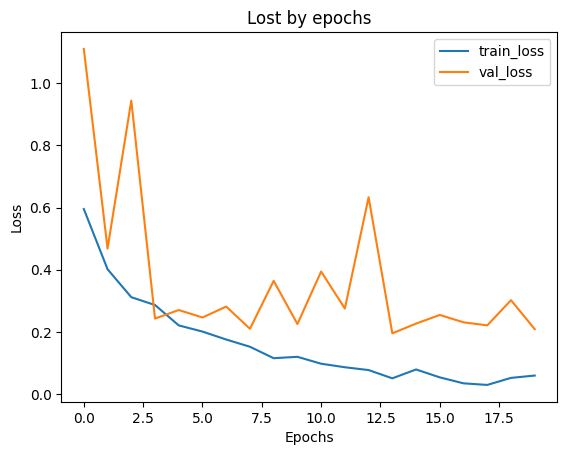

In [29]:
model_lstm_01.show_evolution_loss()

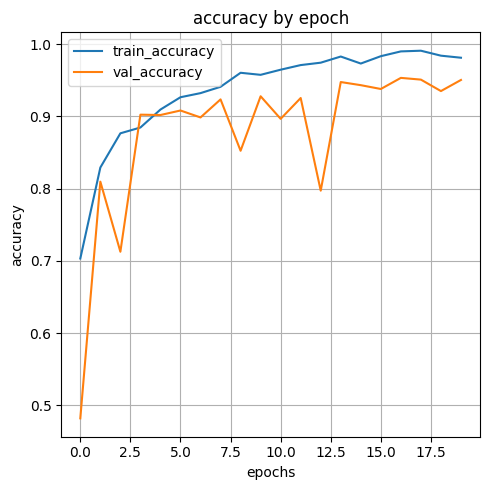

In [30]:
model_lstm_01.show_evolution_metric((5,5))

In [31]:
y_news_proba_test_pred, y_news_test_pred = model_lstm_01.predict(X_pred = X_news_test_pad_sequences, classification_type = "binary")

66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step


In [44]:
# Funciones para evaluar métricas

def model_evaluation_regressor(y_test, y_pred, model_name:str):
    dict_results = {
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'R2': r2_score(y_test, y_pred)
    }
    df = pd.DataFrame(dict_results, index=[f"{model_name}"])
    df.index.name = "Model"
    return df

def model_evaluation_classifier(y_test, y_pred, y_prob, model_name:str):
    dict_results = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob)
    }

    df = pd.DataFrame(dict_results, index=[f"{model_name}"])
    df.index.name = "Model"
    return df

def shows_roc_curve(y_test, y_prob):
    # Graficar curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (AUC = {auc:.3f})")
    plt.plot([0,1], [0,1], 'k--', label="Línea aleatoria")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()

def show_metrics_models(df:pd.DataFrame):
    df.plot(kind='bar', figsize=(25,10))     # o df.plot.bar()
    plt.title("Modelos vs Métricas")
    plt.xlabel("Modelo")
    plt.ylabel("Valor Métrica")
    plt.xticks(rotation=0)  # etiquetas verticales (0 = horizontales)
    plt.legend(title="Métricas")
    plt.show()

def shows_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Pred: No', 'Pred: Sí'],
            yticklabels=['Real: No', 'Real: Sí'])
    plt.xlabel("Predicción del modelo")
    plt.ylabel("Valor real")
    plt.title("Matriz de Confusión")
    plt.show()

    print("Descripción Matriz de Confusión")
    print("---------------------------------")
    print(f"Falsos Positivos: {cm[0][1]}")
    print(f"Falsos Negativos: {cm[1][0]}")
    print(f"Verdaderos Positivos: {cm[1][1]}")
    print(f"Verdaderos Negativos: {cm[0][0]}")

In [33]:
print("\n📊 Classification Report:")
print(classification_report(y_news_test, y_news_test_pred))


📊 Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1006
           1       0.96      0.94      0.95      1076

    accuracy                           0.95      2082
   macro avg       0.95      0.95      0.95      2082
weighted avg       0.95      0.95      0.95      2082



In [34]:
# Evaluacion de desempeño con los datos de predicción
df_results_model_01 = model_evaluation_classifier(y_news_test, y_news_test_pred, y_news_proba_test_pred,"model_01")
df_results_model_01

Accuracy  Precision    Recall  F1 Score       AUC
Model                                                      
model_01  0.950528   0.961137  0.942379  0.951666  0.981182

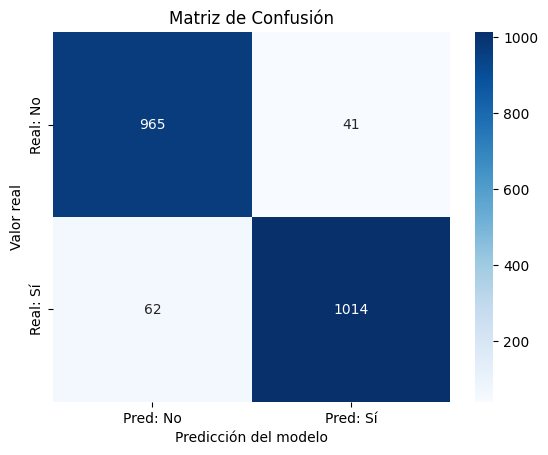

Descripción Matriz de Confusión
---------------------------------
Falsos Positivos: 41
Falsos Negativos: 62
Verdaderos Positivos: 1014
Verdaderos Negativos: 965


In [35]:
# Matriz de confusion
shows_confusion_matrix(y_news_test, y_news_test_pred)

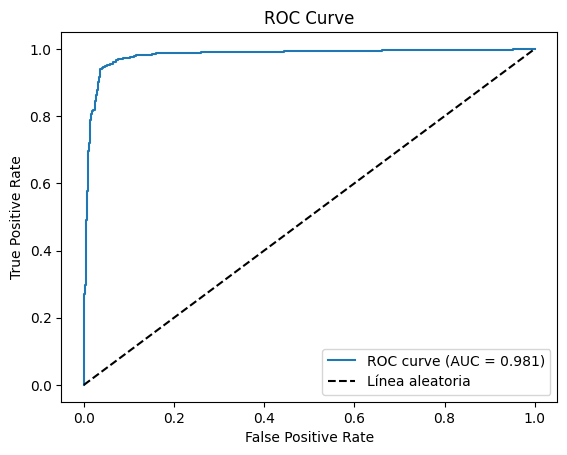

In [36]:
# Curva ROC
shows_roc_curve(y_news_test, y_news_proba_test_pred)

## Actividad 4

Realiza predicciones para el conjunto de noticias del archivo “news_pred.csv”, que contiene siete noticias. Analiza una noticia en la que el modelo se equivoque; si no la hay, una en la que acierte el modelo. Comenta tu resultado.

In [ ]:
y_news_proba_pred, y_news_pred_pred = model_lstm_01.predict(X_pred = X_news_pred_pad_sequences, classification_type = "binary")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


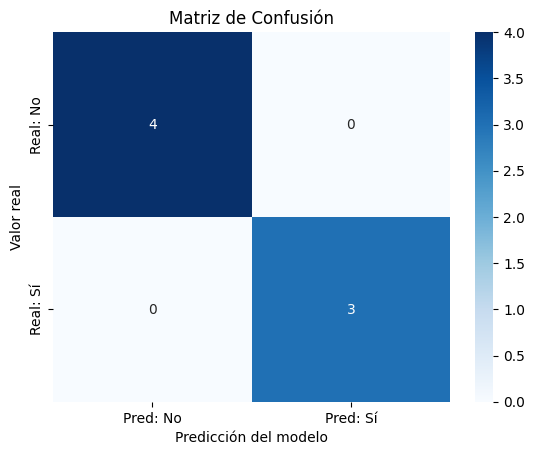

Descripción Matriz de Confusión
---------------------------------
Falsos Positivos: 0
Falsos Negativos: 0
Verdaderos Positivos: 3
Verdaderos Negativos: 4


In [38]:
# Matriz de confusion
shows_confusion_matrix(y_news_pred, y_news_pred_pred)

## Actividad 5

Carga la base de datos de artículos publicados por Mashable llamada “OnlineNewsPopularity.csv”, quita los espacios en blanco que existen en los nombres de las características y elimina columnas que no aporten información a modelos de predicción de la cantidad de veces que el artículo se compartirá. Revisa la existencia o no de valores ausentes y decide qué hacer con ellos en caso que corresponda. Finalmente, calcula los principales indicadores estadísticos para las variables numéricas y comenta.

In [3]:
# Importando el Dataset
df_news_popularity = pd.read_csv("OnlineNewsPopularity.csv", delimiter=",", encoding="utf-8", header=0)
df_news_popularity

url   timedelta  \
0      http://mashable.com/2013/01/07/amazon-instant-...       731.0   
1      http://mashable.com/2013/01/07/ap-samsung-spon...       731.0   
2      http://mashable.com/2013/01/07/apple-40-billio...       731.0   
3      http://mashable.com/2013/01/07/astronaut-notre...       731.0   
4       http://mashable.com/2013/01/07/att-u-verse-apps/       731.0   
...                                                  ...         ...   
39639  http://mashable.com/2014/12/27/samsung-app-aut...         8.0   
39640  http://mashable.com/2014/12/27/seth-rogen-jame...         8.0   
39641  http://mashable.com/2014/12/27/son-pays-off-mo...         8.0   
39642     http://mashable.com/2014/12/27/ukraine-blasts/         8.0   
39643  http://mashable.com/2014/12/27/youtube-channel...         8.0   

        n_tokens_title   n_tokens_content   n_unique_tokens  \
0                 12.0              219.0          0.663594   
1                  9.0              255.0          0.604743   
2                  9.0              211.0          0.575130   
3                  9.0              531.0          0.503788   
4                 13.0             1072.0          0.415646   
...                ...                ...               ...   
39639             11.0              346.0          0.529052   
39640             12.0              328.0          0.696296   
39641             10.0              442.0          0.516355   
39642              6.0              682.0          0.539493   
39643             10.0              157.0          0.701987   

        n_non_stop_words   n_non_stop_unique_tokens   num_hrefs  \
0                    1.0                   0.815385         4.0   
1                    1.0                   0.791946         3.0   
2                    1.0                   0.663866         3.0   
3                    1.0                   0.665635         9.0   
4                    1.0                   0.540890        19.0   
...                  ...                        ...         ...   
39639                1.0                   0.684783         9.0   
39640                1.0                   0.885057         9.0   
39641                1.0                   0.644128        24.0   
39642                1.0                   0.692661        10.0   
39643                1.0                   0.846154         1.0   

        num_self_hrefs   num_imgs  ...   min_positive_polarity  \
0                  2.0        1.0  ...                0.100000   
1                  1.0        1.0  ...                0.033333   
2                  1.0        1.0  ...                0.100000   
3                  0.0        1.0  ...                0.136364   
4                 19.0       20.0  ...                0.033333   
...                ...        ...  ...                     ...   
39639              7.0        1.0  ...                0.100000   
39640              7.0        3.0  ...                0.136364   
39641              1.0       12.0  ...                0.136364   
39642              1.0        1.0  ...                0.062500   
39643              1.0        0.0  ...                0.100000   

        max_positive_polarity   avg_negative_polarity   min_negative_polarity  \
0                        0.70               -0.350000                  -0.600   
1                        0.70               -0.118750                  -0.125   
2                        1.00               -0.466667                  -0.800   
3                        0.80               -0.369697                  -0.600   
4                        1.00               -0.220192                  -0.500   
...                       ...                     ...                     ...   
39639                    0.75               -0.260000                  -0.500   
39640                    0.70               -0.211111                  -0.400   
39641                    0.50               -0.356439                  -0.800   
39642                  

In [4]:
# Valores Nulos
missing_values=df_news_popularity.apply(lambda x: sum(x.isnull()),axis=0)
missing_values

url                              0
 timedelta                       0
 n_tokens_title                  0
 n_tokens_content                0
 n_unique_tokens                 0
                                ..
 title_subjectivity              0
 title_sentiment_polarity        0
 abs_title_subjectivity          0
 abs_title_sentiment_polarity    0
 shares                          0
Length: 61, dtype: int64

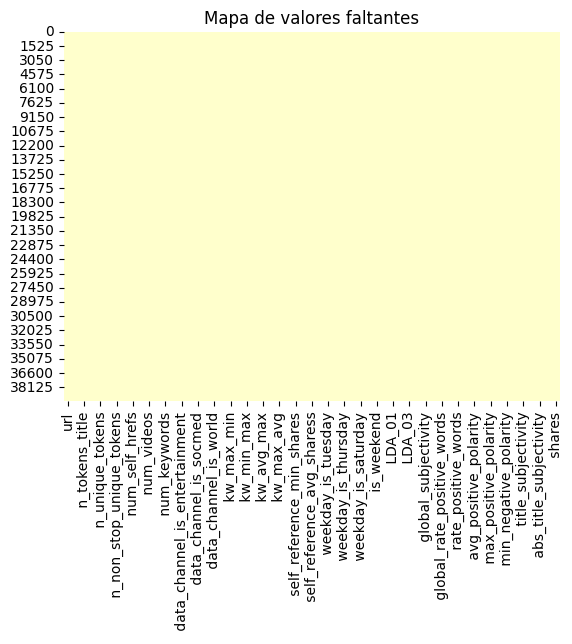

In [6]:
# Mapa de valores faltantes
sns.heatmap(df_news_popularity.isnull(), cbar=False, cmap="YlOrRd")
plt.title("Mapa de valores faltantes")
plt.show()

In [7]:
def df_newspopularity_formated(df:pd.DataFrame, columns_delete_list:list[str]):

    df_ = df.copy()

    # Descartando Columnas
    df_ = df_.drop(columns_delete_list, axis=1)
    # Quitar espacios en blanco en los nombres de columnas
    df_.columns = df_.columns.str.replace(" ", "", regex=False)
    # Mascara valores validos
    mask_valid = df.notna().all(axis=1)
    df_ = df_[mask_valid]

    return df_

In [8]:
df_newspopularity_formated = df_newspopularity_formated(df_news_popularity, ["url"])
df_newspopularity_formated

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0          731.0            12.0             219.0         0.663594   
1          731.0             9.0             255.0         0.604743   
2          731.0             9.0             211.0         0.575130   
3          731.0             9.0             531.0         0.503788   
4          731.0            13.0            1072.0         0.415646   
...          ...             ...               ...              ...   
39639        8.0            11.0             346.0         0.529052   
39640        8.0            12.0             328.0         0.696296   
39641        8.0            10.0             442.0         0.516355   
39642        8.0             6.0             682.0         0.539493   
39643        8.0            10.0             157.0         0.701987   

       n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0                   1.0                  0.815385        4.0             2.0   
1                   1.0                  0.791946        3.0             1.0   
2                   1.0                  0.663866        3.0             1.0   
3                   1.0                  0.665635        9.0             0.0   
4                   1.0                  0.540890       19.0            19.0   
...                 ...                       ...        ...             ...   
39639               1.0                  0.684783        9.0             7.0   
39640               1.0                  0.885057        9.0             7.0   
39641               1.0                  0.644128       24.0             1.0   
39642               1.0                  0.692661       10.0             1.0   
39643               1.0                  0.846154        1.0             1.0   

       num_imgs  num_videos  ...  min_positive_polarity  \
0           1.0         0.0  ...               0.100000   
1           1.0         0.0  ...               0.033333   
2           1.0         0.0  ...               0.100000   
3           1.0         0.0  ...               0.136364   
4          20.0         0.0  ...               0.033333   
...         ...         ...  ...                    ...   
39639       1.0         1.0  ...               0.100000   
39640       3.0        48.0  ...               0.136364   
39641      12.0         1.0  ...               0.136364   
39642       1.0         0.0  ...               0.062500   
39643       0.0         2.0  ...               0.100000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                       0.70              -0.350000                 -0.600   
1                       0.70              -0.118750                 -0.125   
2                       1.00              -0.466667                 -0.800   
3                       0.80              -0.369697                 -0.600   
4                       1.00              -0.220192                 -0.500   
...                      ...                    ...                    ...   
39639                   0.75              -0.260000                 -0.500   
39640                   0.70              -0.211111                 -0.400   
39641                   0.50              -0.356439                 -0.800   
39642                   0.50              -0.205246                 -0.500   
39643                   0.50              -0.200000                 -0.200   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0                  -0.200000            0.500000                 -0.187500   
1                  -0.100000            0.000000                  0.000000   
2                  -0.133333            0.000000                  0.000000   
3                  -0.166667            0.000000                  0.000000   
4                  -0.050000            0.454545                  0.136364   
...                      ...                 ...                       ...   
3

In [9]:
# Tipos de Datos y No Nulos
df_newspopularity_formated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 60 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   timedelta                      39644 non-null  float64
 1   n_tokens_title                 39644 non-null  float64
 2   n_tokens_content               39644 non-null  float64
 3   n_unique_tokens                39644 non-null  float64
 4   n_non_stop_words               39644 non-null  float64
 5   n_non_stop_unique_tokens       39644 non-null  float64
 6   num_hrefs                      39644 non-null  float64
 7   num_self_hrefs                 39644 non-null  float64
 8   num_imgs                       39644 non-null  float64
 9   num_videos                     39644 non-null  float64
 10  average_token_length           39644 non-null  float64
 11  num_keywords                   39644 non-null  float64
 12  data_channel_is_lifestyle      39644 non-null 

In [10]:
columns_continuous = ["timedelta", 
                    "n_tokens_title", 
                    "n_tokens_content", 
                    "n_unique_tokens", 
                    "average_token_length", 
                    "n_non_stop_words", 
                    "n_non_stop_unique_tokens", 
                    "num_hrefs", 
                    "num_self_hrefs", 
                    "num_imgs", 
                    "num_videos", 
                    "num_keywords",
                    "kw_min_min",
                    "kw_max_min",
                    "kw_avg_min",
                    "kw_min_max",
                    "kw_max_max",
                    "kw_avg_max",
                    "kw_min_avg",
                    "kw_max_avg",
                    "kw_avg_avg",
                    "self_reference_min_shares",
                    "self_reference_max_shares",
                    "self_reference_avg_sharess",
                    "LDA_00",
                    "LDA_01",
                    "LDA_02",
                    "LDA_03",
                    "LDA_04",
                    "global_subjectivity",
                    "global_rate_negative_words",
                    "global_rate_positive_words",
                    "global_sentiment_polarity",
                    "avg_positive_polarity",
                    "rate_positive_words",
                    "rate_negative_words",
                    "title_subjectivity",
                    "title_sentiment_polarity",
                    "abs_title_subjectivity",
                    "abs_title_sentiment_polarity",
                    "min_positive_polarity",
                    "max_positive_polarity",
                    "avg_negative_polarity",
                    "min_negative_polarity",
                    "max_negative_polarity",
                    ]

column_target = ["shares"]

columns_categorical = ["data_channel_is_lifestyle",
                    "data_channel_is_entertainment",
                    "data_channel_is_bus",
                    "data_channel_is_socmed",
                    "data_channel_is_tech",
                    "data_channel_is_world",
                    "weekday_is_monday",
                    "weekday_is_tuesday",
                    "weekday_is_wednesday",
                    "weekday_is_thursday",
                    "weekday_is_friday",
                    "weekday_is_saturday",
                    "weekday_is_sunday",
                    "is_weekend",
                    ]

In [86]:
len(columns_continuous) + len(columns_categorical) + len(column_target)

60

In [12]:
df_newspopularity_formated[columns_continuous]

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0          731.0            12.0             219.0         0.663594   
1          731.0             9.0             255.0         0.604743   
2          731.0             9.0             211.0         0.575130   
3          731.0             9.0             531.0         0.503788   
4          731.0            13.0            1072.0         0.415646   
...          ...             ...               ...              ...   
39639        8.0            11.0             346.0         0.529052   
39640        8.0            12.0             328.0         0.696296   
39641        8.0            10.0             442.0         0.516355   
39642        8.0             6.0             682.0         0.539493   
39643        8.0            10.0             157.0         0.701987   

       average_token_length  n_non_stop_words  n_non_stop_unique_tokens  \
0                  4.680365               1.0                  0.815385   
1                  4.913725               1.0                  0.791946   
2                  4.393365               1.0                  0.663866   
3                  4.404896               1.0                  0.665635   
4                  4.682836               1.0                  0.540890   
...                     ...               ...                       ...   
39639              4.523121               1.0                  0.684783   
39640              4.405488               1.0                  0.885057   
39641              5.076923               1.0                  0.644128   
39642              4.975073               1.0                  0.692661   
39643              4.471338               1.0                  0.846154   

       num_hrefs  num_self_hrefs  num_imgs  ...  rate_negative_words  \
0            4.0             2.0       1.0  ...             0.230769   
1            3.0             1.0       1.0  ...             0.266667   
2            3.0             1.0       1.0  ...             0.142857   
3            9.0             0.0       1.0  ...             0.333333   
4           19.0            19.0      20.0  ...             0.139785   
...          ...             ...       ...  ...                  ...   
39639        9.0             7.0       1.0  ...             0.277778   
39640        9.0             7.0       3.0  ...             0.187500   
39641       24.0             1.0      12.0  ...             0.423077   
39642       10.0             1.0       1.0  ...             0.533333   
39643        1.0             1.0       0.0  ...             0.166667   

       title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
0                0.500000                 -0.187500                0.000000   
1                0.000000                  0.000000                0.500000   
2                0.000000                  0.000000                0.500000   
3                0.000000                  0.000000                0.500000   
4                0.454545                  0.136364                0.045455   
...                   ...                       ...                     ...   
39639            0.100000                  0.000000                0.400000   
39640            0.300000                  1.000000                0.200000   
39641            0.454545                  0.136364                0.045455   
39642            0.000000                  0.000000                0.500000   
39643            0.333333                  0.250000                0.166667   

       abs_title_sentiment_polarity  min_positive_polarity  \
0                          0.187500               0.100000   
1                          0.000000               0.033333   
2                          0.000000               0.100000   
3                          0.000000               0.136364   
4                          0.136364               0.033333   
...                             ...                    ...   
39639

In [13]:
df_newspopularity_formated[columns_categorical]

data_channel_is_lifestyle  data_channel_is_entertainment  \
0                            0.0                            1.0   
1                            0.0                            0.0   
2                            0.0                            0.0   
3                            0.0                            1.0   
4                            0.0                            0.0   
...                          ...                            ...   
39639                        0.0                            0.0   
39640                        0.0                            0.0   
39641                        0.0                            0.0   
39642                        0.0                            0.0   
39643                        0.0                            1.0   

       data_channel_is_bus  data_channel_is_socmed  data_channel_is_tech  \
0                      0.0                     0.0                   0.0   
1                      1.0                     0.0                   0.0   
2                      1.0                     0.0                   0.0   
3                      0.0                     0.0                   0.0   
4                      0.0                     0.0                   1.0   
...                    ...                     ...                   ...   
39639                  0.0                     0.0                   1.0   
39640                  0.0                     1.0                   0.0   
39641                  0.0                     0.0                   0.0   
39642                  0.0                     0.0                   0.0   
39643                  0.0                     0.0                   0.0   

       data_channel_is_world  weekday_is_monday  weekday_is_tuesday  \
0                        0.0                1.0                 0.0   
1                        0.0                1.0                 0.0   
2                        0.0                1.0                 0.0   
3                        0.0                1.0                 0.0   
4                        0.0                1.0                 0.0   
...                      ...                ...                 ...   
39639                    0.0                0.0                 0.0   
39640                    0.0                0.0                 0.0   
39641                    0.0                0.0                 0.0   
39642                    1.0                0.0                 0.0   
39643                    0.0                0.0                 0.0   

       weekday_is_wednesday  weekday_is_thursday  weekday_is_friday  \
0                       0.0                  0.0                0.0   
1                       0.0                  0.0                0.0   
2                       0.0                  0.0                0.0   
3                       0.0                  0.0                0.0   
4                       0.0                  0.0                0.0   
...                     ...                  ...                ...   
39639                   1.0                  0.0                0.0   
39640                   1.0                  0.0                0.0   
39641                   1.0                  0.0                0.0   
39642                   1.0                  0.0                0.0   
39643                   1.0                  0.0                0.0   

       weekday_is_saturday  weekday_is_sunday  is_weekend  
0                      0.0                0.0         0.0  
1                      0.0                0.0         0.0  
2                      0.0                0.0         0.0  
3                      0.0                0.0         0.0  
4                      0.0                0.0         0.0  
...                    ...                ...         ...  
39639                  0.0                0.0         0.0  
39640                  0.0                0.0         0.0  
39641                  0.0                0

In [14]:
df_newspopularity_formated[column_target]

shares
0         593
1         711
2        1500
3        1200
4         505
...       ...
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300

[39644 rows x 1 columns]

In [16]:
# Método para graficar
def plot_df_columns(
    df: pd.DataFrame,
    tipo: str = "histplot",
    figsize=(14, 8),
    kde: bool = False,
    bins_list=None,
    stat: str = "count"
):
    """
    Grafica todas las columnas numéricas de un DataFrame en subplots.
    
    Parámetros
    ----------
    df : pd.DataFrame
        DataFrame con los datos.
    tipo : {"hisplot","histplot","boxplot"}
        Tipo de gráfico por subplot. Se acepta el typo "hisplot" (histplot).
    figsize : tuple
        Tamaño de la figura en pulgadas (ancho, alto) para plt.subplots.
    kde : bool
        Si True, añade curva KDE en histplot. Ignorado en boxplot.
    bins_list : list | None
        Lista con los bins a usar para cada columna (solo histplot).
        - Puede contener enteros, secuencias de bordes, o None.
        - Si la lista es más corta que el número de columnas, las
          faltantes usarán "auto".
    stat : {"count","frequency","density","probability"}
        Estadístico para histplot (ignorado en boxplot).
    """
    # Copia de trabajo
    df_ = df.copy()

    # Normalizar tipo
    tipo = (tipo or "").lower().strip()
    if tipo == "hisplot":  # aceptar el typo pedido
        tipo = "histplot"
    if tipo not in {"histplot", "boxplot"}:
        raise ValueError('tipo debe ser "hisplot"/"histplot" o "boxplot".')

    # Solo columnas numéricas (ambos gráficos requieren datos numéricos)
    cols = df_.select_dtypes(include=[np.number]).columns.tolist()
    if len(cols) == 0:
        raise ValueError("No hay columnas numéricas para graficar.")

    n = len(cols)
    # Distribuir subplots en una cuadrícula "cuadrada"
    ncols = math.ceil(math.sqrt(n))
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    axes = np.array(axes).reshape(-1) if isinstance(axes, np.ndarray) else np.array([axes])

    # Preparar bins por columna si corresponde
    if bins_list is None:
        bins_list = []
    # Asegurar longitud
    if len(bins_list) < n:
        bins_list = list(bins_list) + ["auto"] * (n - len(bins_list))

    for i, col in enumerate(cols):
        ax = axes[i]
        serie = df_[col].dropna()

        if tipo == "histplot":
            bins = bins_list[i]
            sns.histplot(serie, bins=bins, kde=kde, stat=stat, ax=ax)
        else:  # boxplot
            sns.boxplot(x=serie, ax=ax)

        ax.set_title(str(col))

    # Ocultar axes no usados si la rejilla es más grande que n
    for j in range(n, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout()
    plt.show()

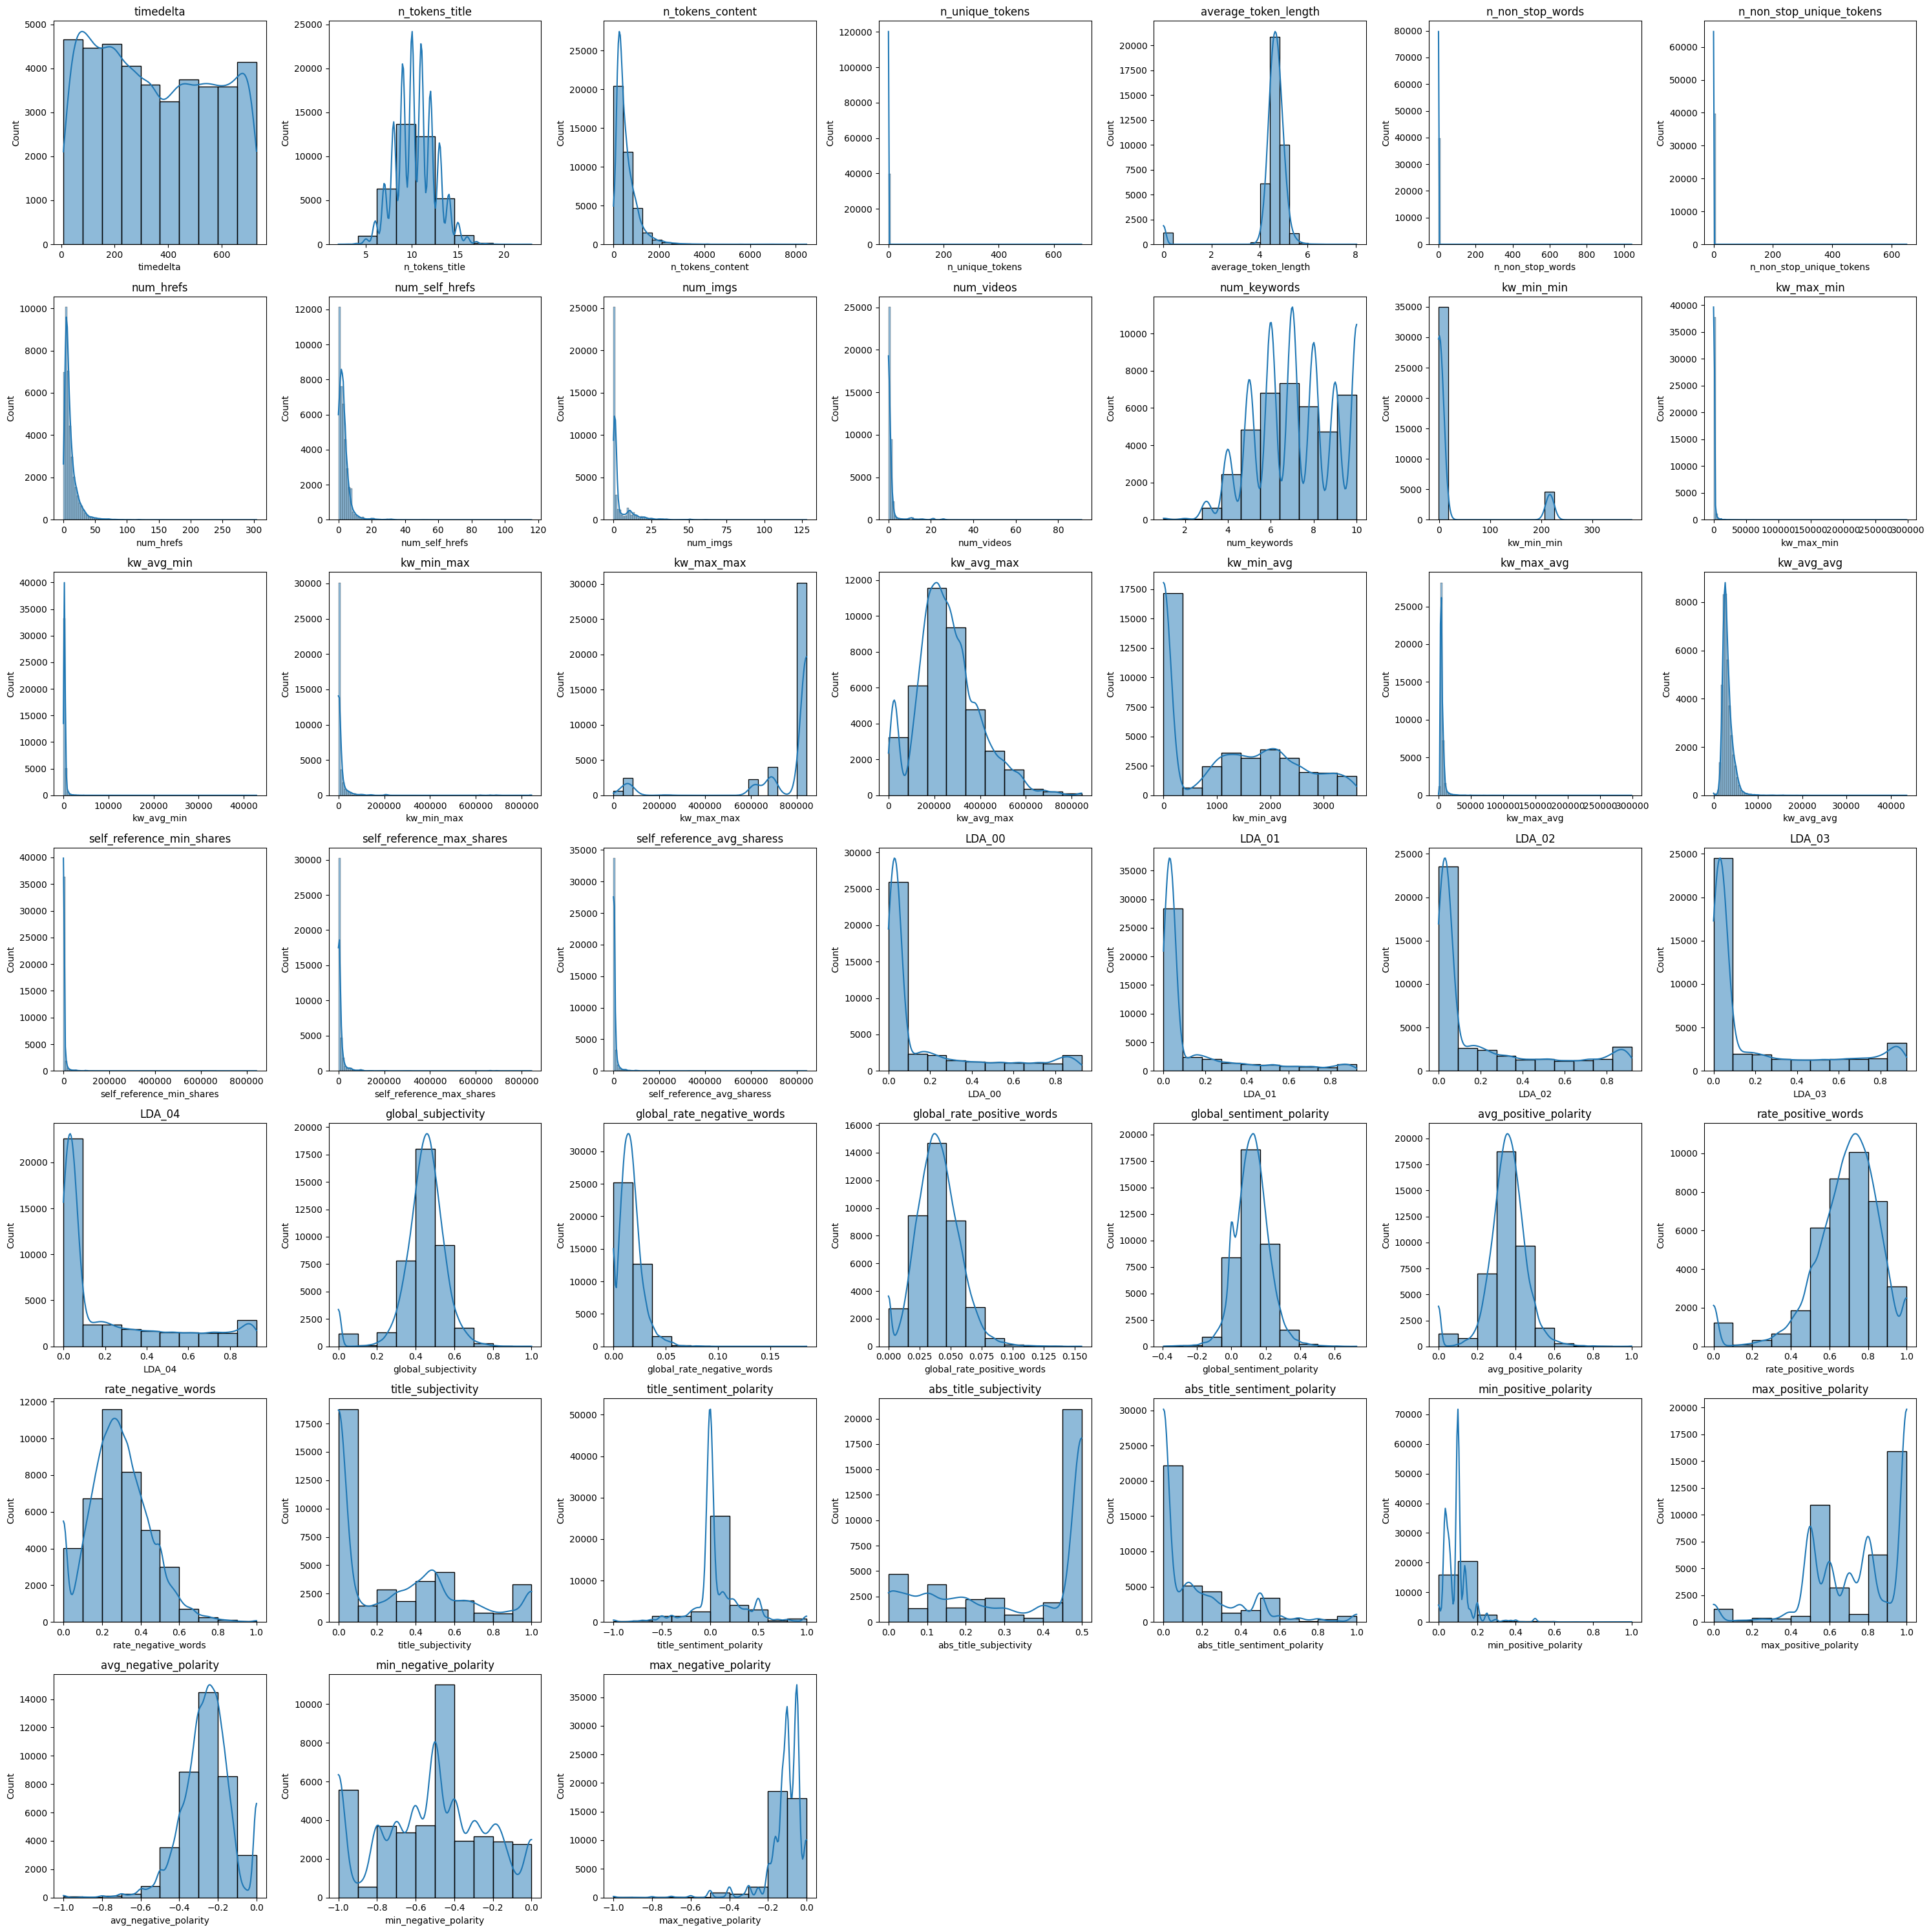

In [17]:
# Graficando histogramas para columnas numericas continuas (No categóricas)

plot_df_columns(df= df_newspopularity_formated[columns_continuous], 
                tipo= "histplot", 
                figsize=(30, 30), 
                kde= True, 
                bins_list=[10, 10, 20, 100, 20, 100, 100,
                           100, 100, 100, 100, 10, 20, 100,
                           100, 100, 20, 10, 10, 100, 100,
                           100, 100, 100, 10, 10, 10, 10,
                           10, 10, 10, 10, 10, 10, 10,
                           10, 10, 10, 10, 10, 10, 10,
                           10, 10, 10], 
                stat= "count")

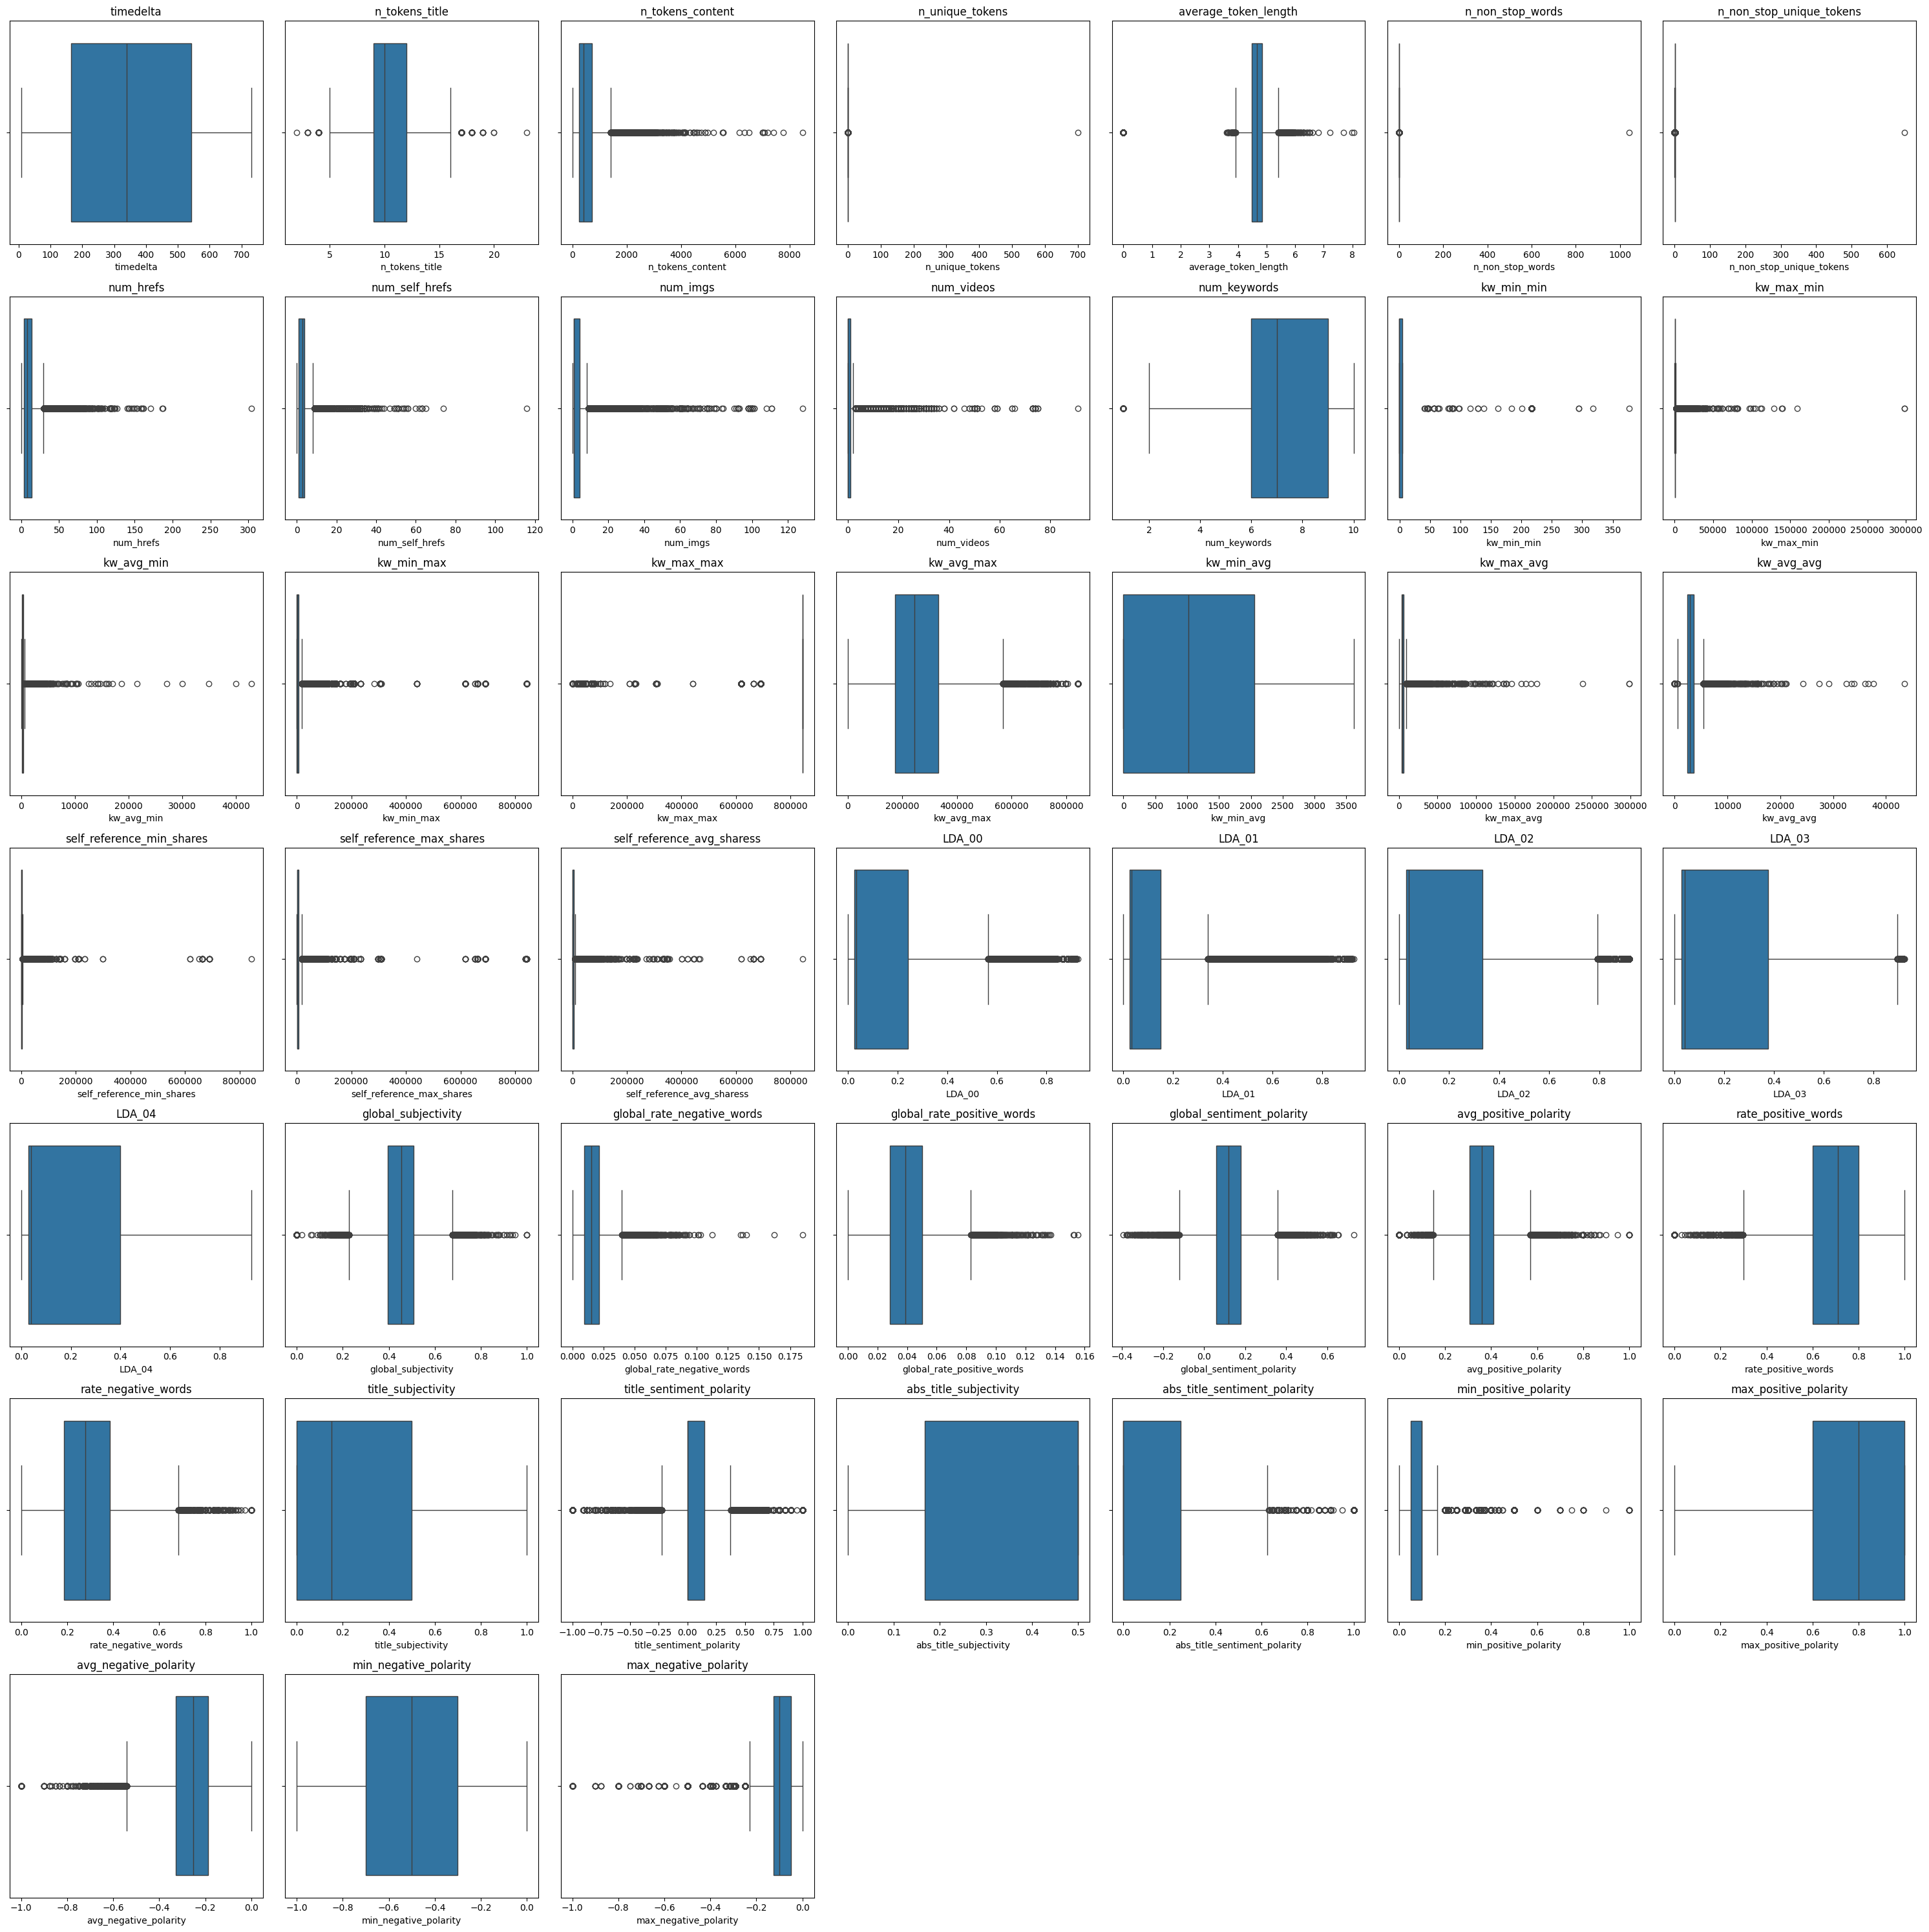

In [18]:
# Graficando boxplot para columnas numericas continuas (No categóricas)

plot_df_columns(df= df_newspopularity_formated[columns_continuous], 
                tipo= "boxplot", 
                figsize=(30, 30), 
                kde= True, 
                bins_list=[10, 10, 20, 100, 20, 100, 100,
                           100, 100, 100, 100, 10, 20, 100,
                           100, 100, 20, 10, 10, 100, 100,
                           100, 100, 100, 10, 10, 10, 10,
                           10, 10, 10, 10, 10, 10, 10,
                           10, 10, 10, 10, 10, 10, 10,
                           10, 10, 10], 
                stat= "count")

In [20]:
# Principales valores estadisticos de variables continuas

df_newspopularity_formated[columns_continuous].describe()

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
count  39644.000000    39644.000000      39644.000000     39644.000000   
mean     354.530471       10.398749        546.514731         0.548216   
std      214.163767        2.114037        471.107508         3.520708   
min        8.000000        2.000000          0.000000         0.000000   
25%      164.000000        9.000000        246.000000         0.470870   
50%      339.000000       10.000000        409.000000         0.539226   
75%      542.000000       12.000000        716.000000         0.608696   
max      731.000000       23.000000       8474.000000       701.000000   

       average_token_length  n_non_stop_words  n_non_stop_unique_tokens  \
count          39644.000000      39644.000000              39644.000000   
mean               4.548239          0.996469                  0.689175   
std                0.844406          5.231231                  3.264816   
min                0.000000          0.000000                  0.000000   
25%                4.478404          1.000000                  0.625739   
50%                4.664082          1.000000                  0.690476   
75%                4.854839          1.000000                  0.754630   
max                8.041534       1042.000000                650.000000   

          num_hrefs  num_self_hrefs      num_imgs  ...  rate_negative_words  \
count  39644.000000    39644.000000  39644.000000  ...         39644.000000   
mean      10.883690        3.293638      4.544143  ...             0.287934   
std       11.332017        3.855141      8.309434  ...             0.156156   
min        0.000000        0.000000      0.000000  ...             0.000000   
25%        4.000000        1.000000      1.000000  ...             0.185185   
50%        8.000000        3.000000      1.000000  ...             0.280000   
75%       14.000000        4.000000      4.000000  ...             0.384615   
max      304.000000      116.000000    128.000000  ...             1.000000   

       title_subjectivity  title_sentiment_polarity  abs_title_subjectivity  \
count        39644.000000              39644.000000            39644.000000   
mean             0.282353                  0.071425                0.341843   
std              0.324247                  0.265450                0.188791   
min              0.000000                 -1.000000                0.000000   
25%              0.000000                  0.000000                0.166667   
50%              0.150000                  0.000000                0.500000   
75%              0.500000                  0.150000                0.500000   
max              1.000000                  1.000000                0.500000   

       abs_title_sentiment_polarity  min_positive_polarity  \
count                  39644.000000           39644.000000   
mean                       0.156064               0.095446   
std                        0.226294               0.071315   
min                        0.000000               0.000000   
25%                        0.000000               0.050000   
50%                        0.000000               0.100000   
75%                        0.250000               0.100000   
max                        1.000000               1.000000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
count           39644.000000           39644.000000           39644.000000   
mean                0.756728              -0.259524              -0.521944   
std                 0.247786               0.127726               0.290290   
min                 0.000000              -1.000000              -1.000000   
25%                 0.600000              -0.328383              -0.700000   
50%                 0.800000              -0.253333              -0.500000   
75%                 1.000000              -0.186905              -0.300000   
max                 1.000000               0.000000         

## Actividad 6

Realice una búsqueda de outliers para la variable objetivo shares y elimina estos valores. Muestra gráficamente la distribución de la variable con outliers y sin outliers. Calcula y muestra gráficamente las correlaciones entre las variables numéricas y lista aquellas cuyas correlaciones son mayores a 0.7 en términos absolutos; luego elimina una variable de cada par de ellas con correlaciones altas. Debes mostrar gráficamente la situación antes de la eliminación de variables con alta correlación y después de haber realizado la eliminación.

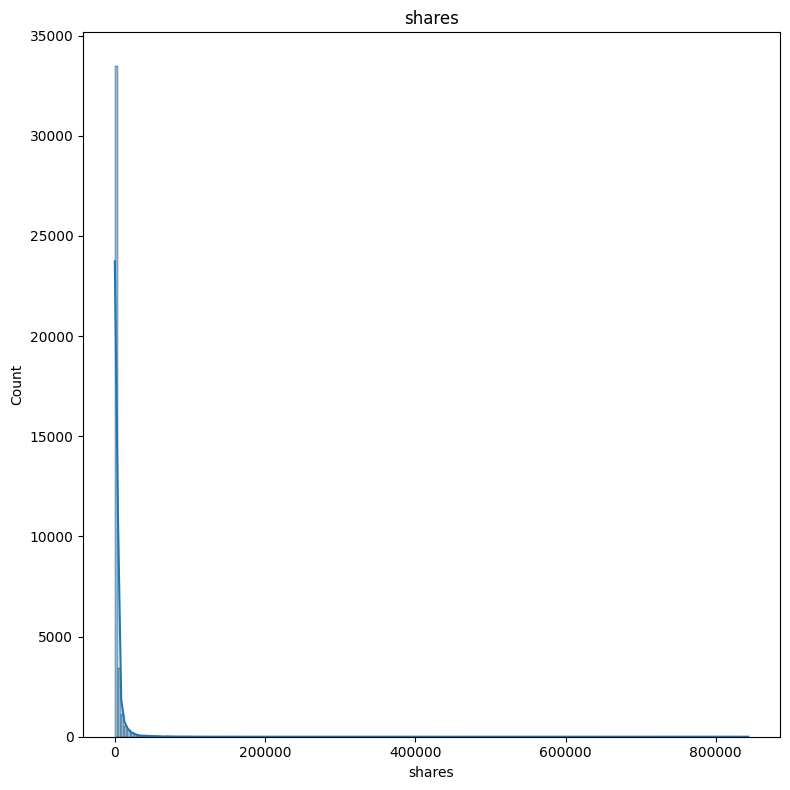

In [21]:
# Graficando histograma para columna numerica continua target (No categóricas)

plot_df_columns(df= df_newspopularity_formated[column_target], 
                tipo= "histplot", 
                figsize=(8, 8), 
                kde= True, 
                bins_list=[200], 
                stat= "count")

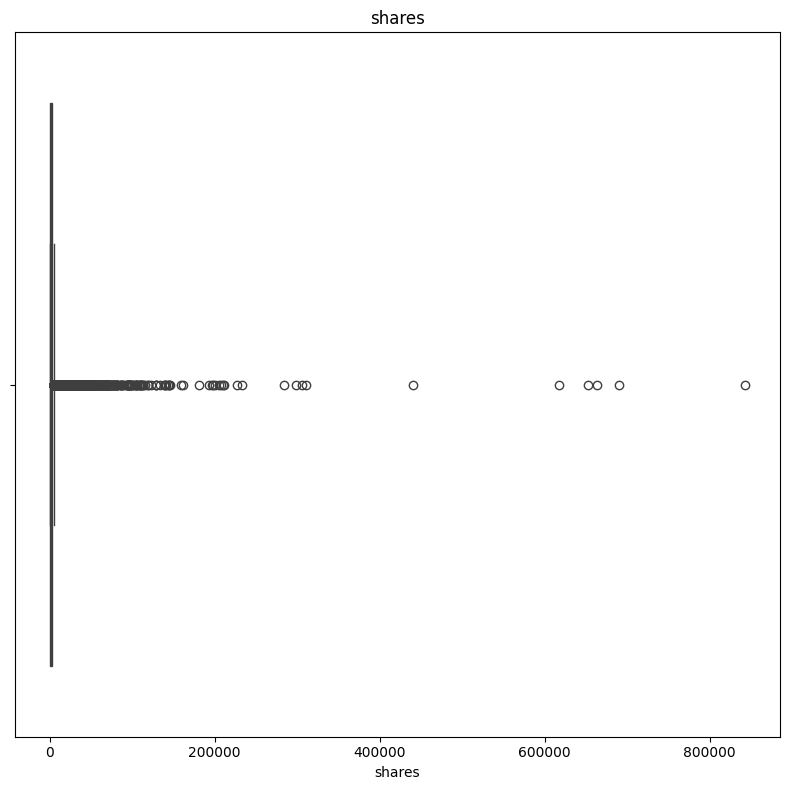

In [22]:
# Graficando boxplot para columna numerica continua target (No categóricas)

plot_df_columns(df= df_newspopularity_formated[column_target], 
                tipo= "boxplot", 
                figsize=(8, 8), 
                kde= True, 
                bins_list=[200], 
                stat= "count")

In [23]:
# Método para identificar y eliminar filas de valores atípicos en las columnas especificadas. Además identifica máscaras de outliers y no_outliers

def Delete_Outliers(df:pd.DataFrame, columns_names:list):

    # Definir limites minimos y máximos para los valores atípicos, por cada columna
    df_ = df.copy()
    df_limitis = pd.DataFrame(columns= columns_names, index = ["lim_min","lim_max"])
    
    for column_name in columns_names:

            Q1 = df_[f'{column_name}'].quantile(0.25)
            Q3 = df_[f'{column_name}'].quantile(0.75)

            IQR = Q3 - Q1

            lim_min = Q1- 1.5 * IQR
            lim_max = Q3 + 1.5 * IQR

            df_limitis.loc["lim_min",f'{column_name}'] = lim_min
            df_limitis.loc["lim_max",f'{column_name}'] = lim_max

    rows = df_.shape[0]

    conditions_rows = []

    for row in range(rows):

        conditions_row = []

        for column_name in columns_names:
             
            condition:bool = (df_limitis.loc["lim_min",column_name] <= df_.iloc[row][column_name]) & (df_.iloc[row][column_name] <= df_limitis.loc["lim_max",column_name])
            conditions_row.append(condition)
        
        if(any(conditions_row)):
             
             conditions_rows.append(True)

        else:
             conditions_rows.append(False)

    mask_no_outliers = pd.DataFrame(conditions_rows, columns=["condition"])
    mask_no_outliers = mask_no_outliers["condition"]
    mask_outliers = ~mask_no_outliers
    df_filtered = df_[mask_no_outliers]
    df_outliers = df_[mask_outliers]

    return mask_no_outliers, mask_outliers, df_filtered, df_outliers, df_limitis

In [24]:
# Realizamos el analis de outliers
mask_no_outliers_newspopularity, mask_outliers_newspopularity, df_newspopularity_without_outliers, df_outliers_newspopularity, df_limitis_newspopularity = Delete_Outliers(df_newspopularity_formated,column_target)

In [25]:
# Los limites de outliers
df_limitis_newspopularity

shares
lim_min -1835.0
lim_max  5581.0

In [26]:
# Los filas outliers que estan fuera de los limites
df_outliers_newspopularity

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
13         731.0             9.0             285.0         0.744186   
16         731.0             8.0            1118.0         0.512397   
18         731.0            11.0             103.0         0.689320   
19         731.0             8.0            1207.0         0.410579   
36         731.0            10.0            1244.0         0.417547   
...          ...             ...               ...              ...   
39588        9.0            10.0             759.0         0.523352   
39595        9.0            12.0             334.0         0.573171   
39598        9.0            11.0               0.0         0.000000   
39615        9.0            11.0               0.0         0.000000   
39621        9.0             9.0             468.0         0.582781   

       n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
13                  1.0                  0.841530        4.0             2.0   
16                  1.0                  0.709770       26.0            18.0   
18                  1.0                  0.806452        3.0             1.0   
19                  1.0                  0.548969       24.0            24.0   
36                  1.0                  0.562579       27.0            22.0   
...                 ...                       ...        ...             ...   
39588               1.0                  0.700837        2.0             2.0   
39595               1.0                  0.757895        2.0             1.0   
39598               0.0                  0.000000        0.0             0.0   
39615               0.0                  0.000000        0.0             0.0   
39621               1.0                  0.691318       17.0             1.0   

       num_imgs  num_videos  ...  min_positive_polarity  \
13          0.0        21.0  ...               0.160000   
16         12.0         1.0  ...               0.100000   
18          1.0         0.0  ...               0.033333   
19         42.0         0.0  ...               0.100000   
36         20.0         0.0  ...               0.033333   
...         ...         ...  ...                    ...   
39588      21.0         0.0  ...               0.100000   
39595       0.0         1.0  ...               0.100000   
39598       0.0         1.0  ...               0.000000   
39615      21.0         1.0  ...               0.000000   
39621       1.0         0.0  ...               0.100000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
13                       1.0              -0.337889                -0.7000   
16                       1.0              -0.401437                -1.0000   
18                       0.5              -0.125000                -0.1250   
19                       1.0              -0.226786                -0.5000   
36                       1.0              -0.230263                -0.6000   
...                      ...                    ...                    ...   
39588                    1.0              -0.358333                -0.7500   
39595                    0.6              -0.131250                -0.1875   
39598                    0.0               0.000000                 0.0000   
39615                    0.0               0.000000                 0.0000   
39621                    0.5              -0.282500                -0.7000   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
13                    -0.100            1.000000                 -1.000000   
16                    -0.050            0.566667                 -0.100000   
18                    -0.125            0.857143                 -0.714286   
19                    -0.050            0.500000                  0.000000   
36                    -0.050            1.000000                 -0.600000   
...                      ...                 ...                       ...   
3

In [27]:
# Dataframe sin los valores outliers
df_newspopularity_without_outliers

timedelta  n_tokens_title  n_tokens_content  n_unique_tokens  \
0          731.0            12.0             219.0         0.663594   
1          731.0             9.0             255.0         0.604743   
2          731.0             9.0             211.0         0.575130   
3          731.0             9.0             531.0         0.503788   
4          731.0            13.0            1072.0         0.415646   
...          ...             ...               ...              ...   
39639        8.0            11.0             346.0         0.529052   
39640        8.0            12.0             328.0         0.696296   
39641        8.0            10.0             442.0         0.516355   
39642        8.0             6.0             682.0         0.539493   
39643        8.0            10.0             157.0         0.701987   

       n_non_stop_words  n_non_stop_unique_tokens  num_hrefs  num_self_hrefs  \
0                   1.0                  0.815385        4.0             2.0   
1                   1.0                  0.791946        3.0             1.0   
2                   1.0                  0.663866        3.0             1.0   
3                   1.0                  0.665635        9.0             0.0   
4                   1.0                  0.540890       19.0            19.0   
...                 ...                       ...        ...             ...   
39639               1.0                  0.684783        9.0             7.0   
39640               1.0                  0.885057        9.0             7.0   
39641               1.0                  0.644128       24.0             1.0   
39642               1.0                  0.692661       10.0             1.0   
39643               1.0                  0.846154        1.0             1.0   

       num_imgs  num_videos  ...  min_positive_polarity  \
0           1.0         0.0  ...               0.100000   
1           1.0         0.0  ...               0.033333   
2           1.0         0.0  ...               0.100000   
3           1.0         0.0  ...               0.136364   
4          20.0         0.0  ...               0.033333   
...         ...         ...  ...                    ...   
39639       1.0         1.0  ...               0.100000   
39640       3.0        48.0  ...               0.136364   
39641      12.0         1.0  ...               0.136364   
39642       1.0         0.0  ...               0.062500   
39643       0.0         2.0  ...               0.100000   

       max_positive_polarity  avg_negative_polarity  min_negative_polarity  \
0                       0.70              -0.350000                 -0.600   
1                       0.70              -0.118750                 -0.125   
2                       1.00              -0.466667                 -0.800   
3                       0.80              -0.369697                 -0.600   
4                       1.00              -0.220192                 -0.500   
...                      ...                    ...                    ...   
39639                   0.75              -0.260000                 -0.500   
39640                   0.70              -0.211111                 -0.400   
39641                   0.50              -0.356439                 -0.800   
39642                   0.50              -0.205246                 -0.500   
39643                   0.50              -0.200000                 -0.200   

       max_negative_polarity  title_subjectivity  title_sentiment_polarity  \
0                  -0.200000            0.500000                 -0.187500   
1                  -0.100000            0.000000                  0.000000   
2                  -0.133333            0.000000                  0.000000   
3                  -0.166667            0.000000                  0.000000   
4                  -0.050000            0.454545                  0.136364   
...                      ...                 ...                       ...   
3

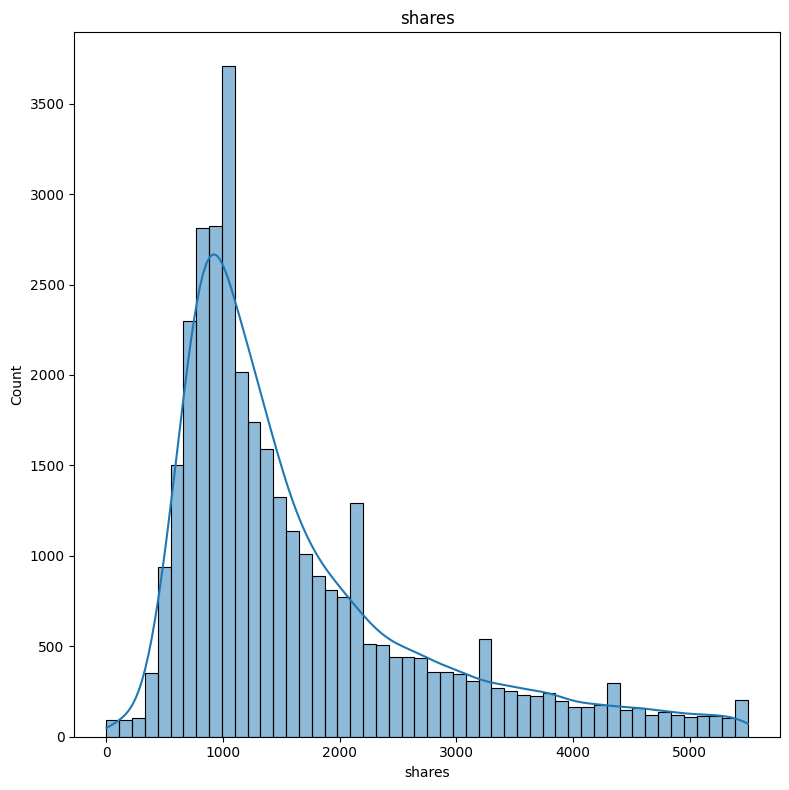

In [28]:
# Graficando histograma para columna numerica continua target sin outliers (No categóricas)

plot_df_columns(df= df_newspopularity_without_outliers[column_target], 
                tipo= "histplot", 
                figsize=(8, 8), 
                kde= True, 
                bins_list=[50], 
                stat= "count")

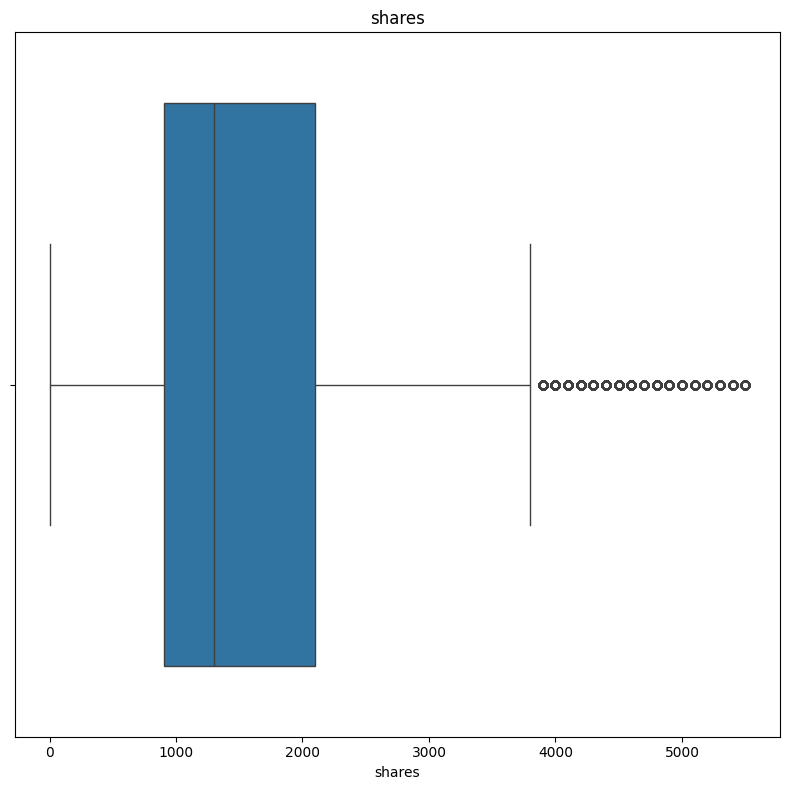

In [29]:
# Graficando boxplot para columna numerica continua target sin outliers (No categóricas)

plot_df_columns(df= df_newspopularity_without_outliers[column_target], 
                tipo= "boxplot", 
                figsize=(8, 8), 
                kde= True, 
                bins_list=[50], 
                stat= "count")

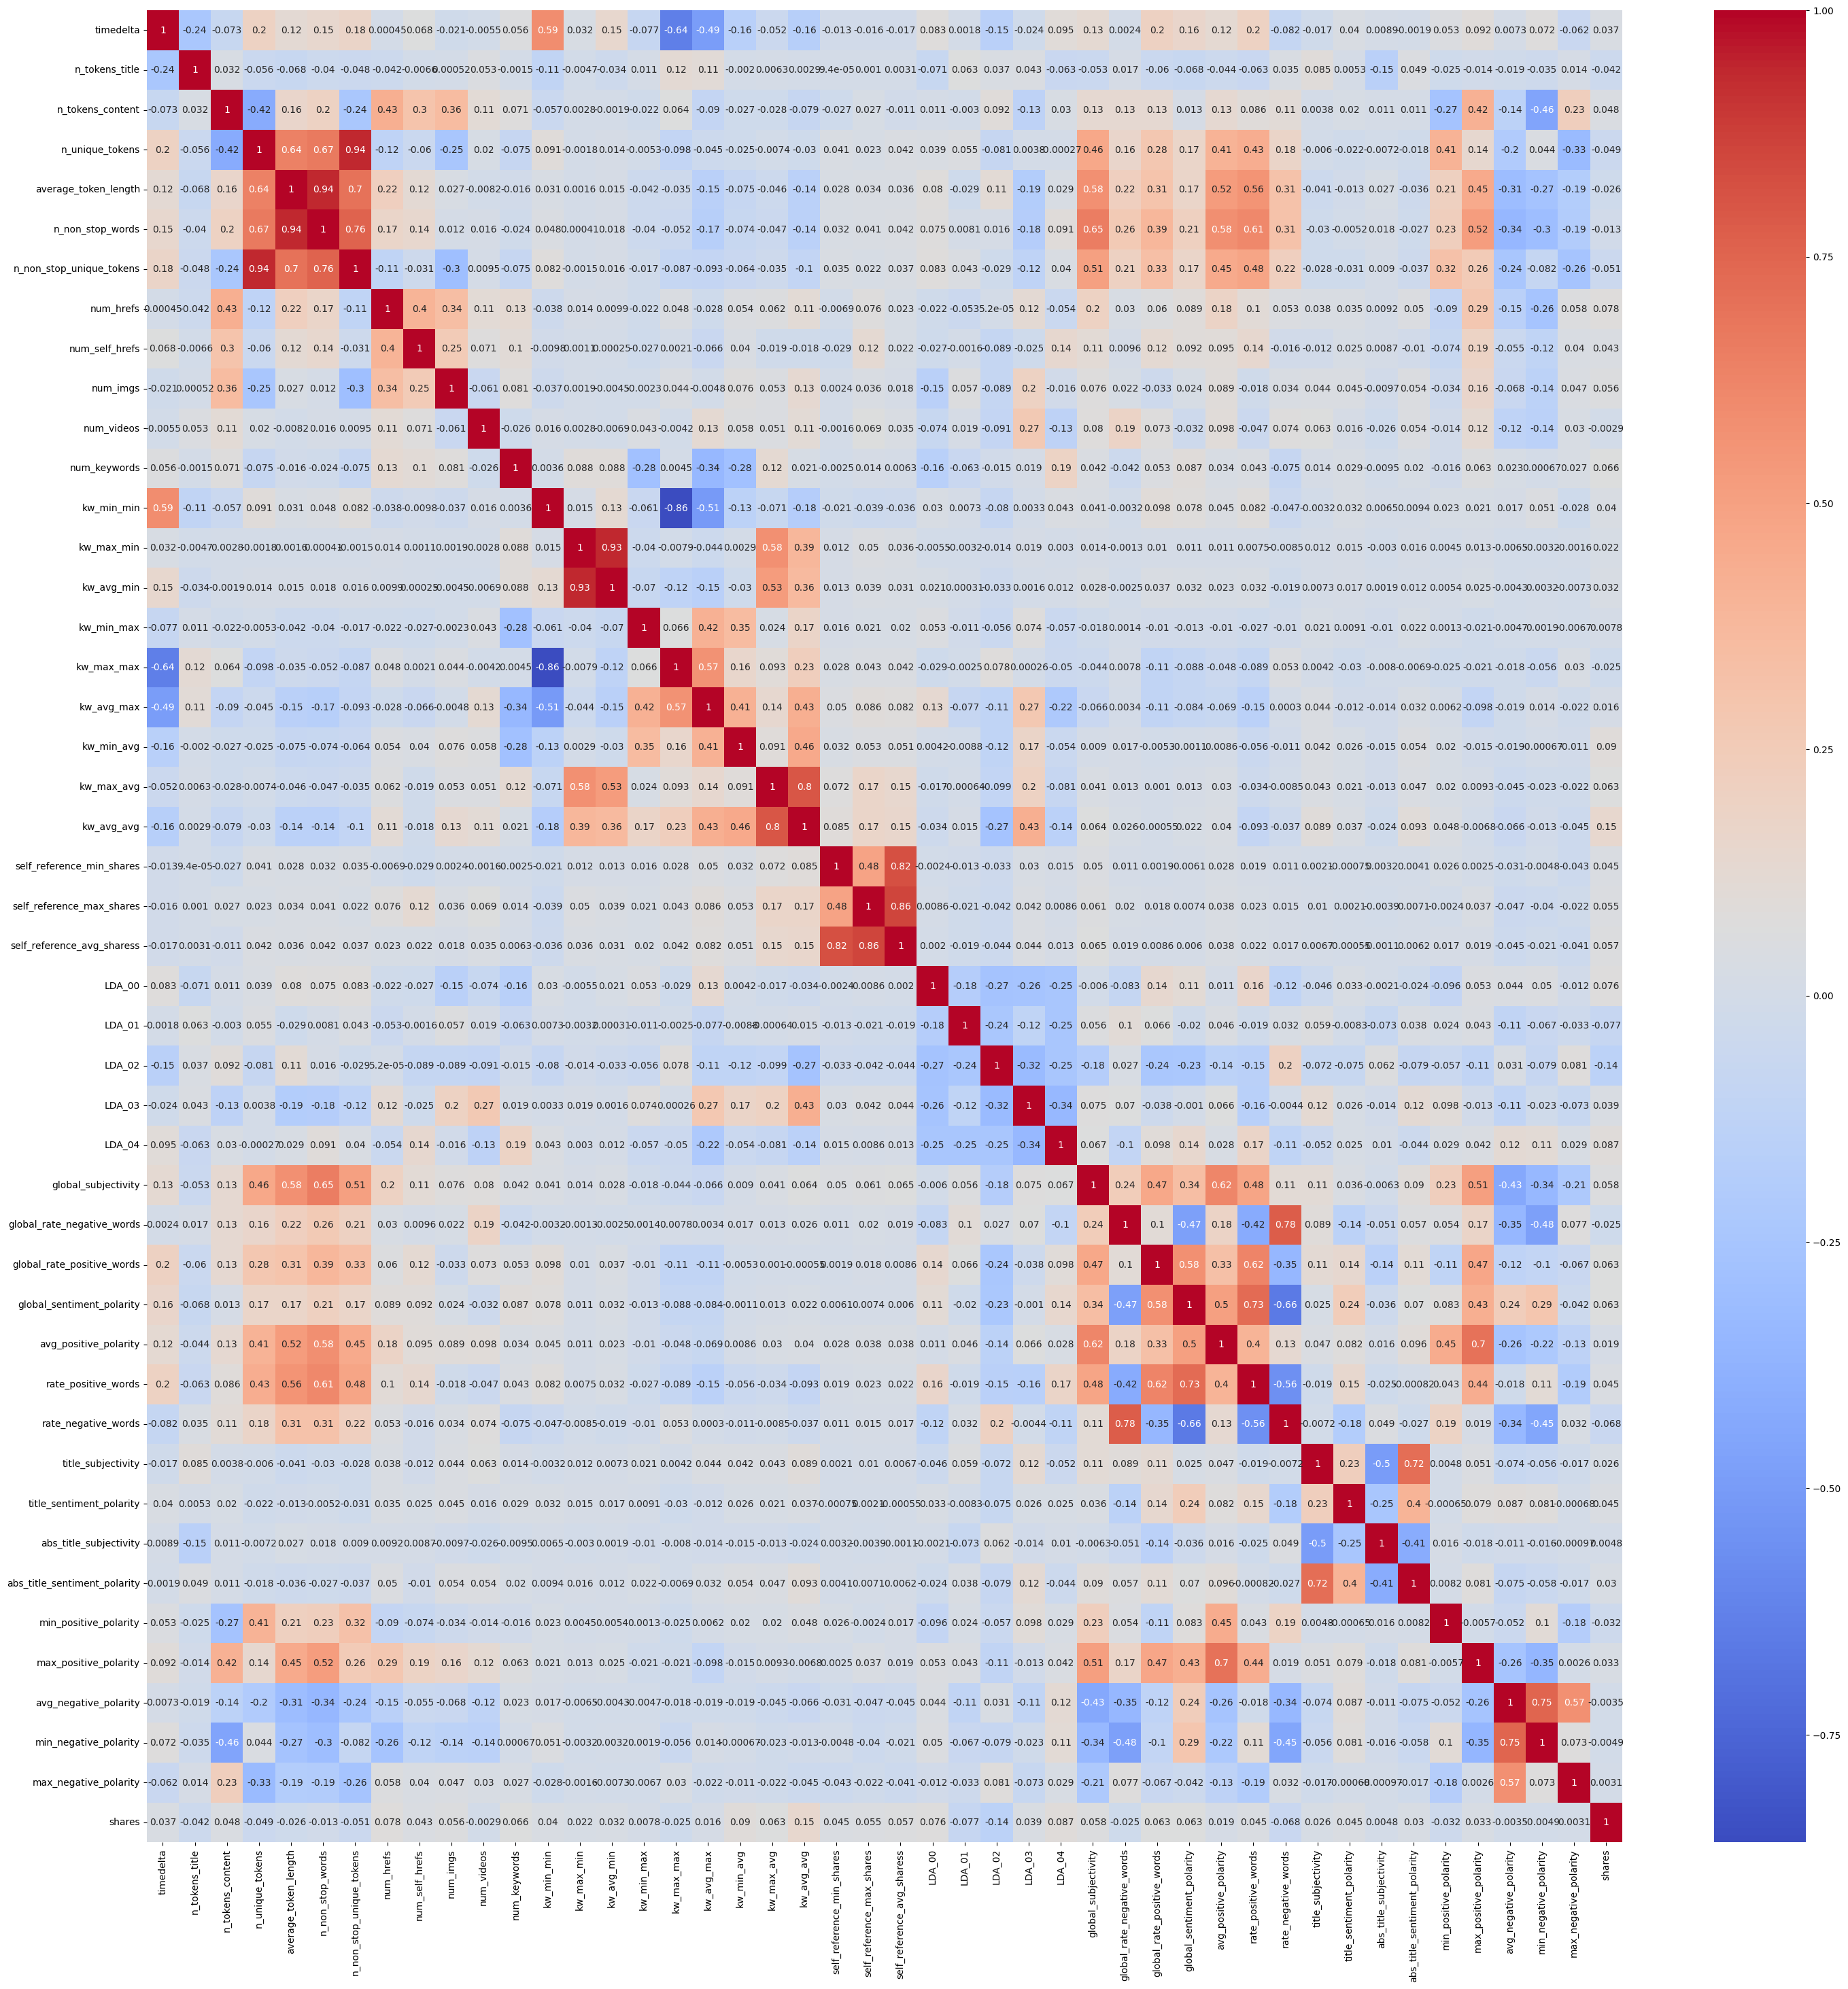

In [30]:
# Matriz de Correlacion de Pearson para relacionar variables numericas, no utilizaremos chi-cuadrado o ANOVA 
# Graficar Correlaciones
plt.figure(figsize=(35,35))
df_formated_sorted_correlation = df_newspopularity_without_outliers[columns_continuous + column_target].corr(method="pearson")
sns.heatmap(df_formated_sorted_correlation, annot=True, cmap='coolwarm')
plt.show()

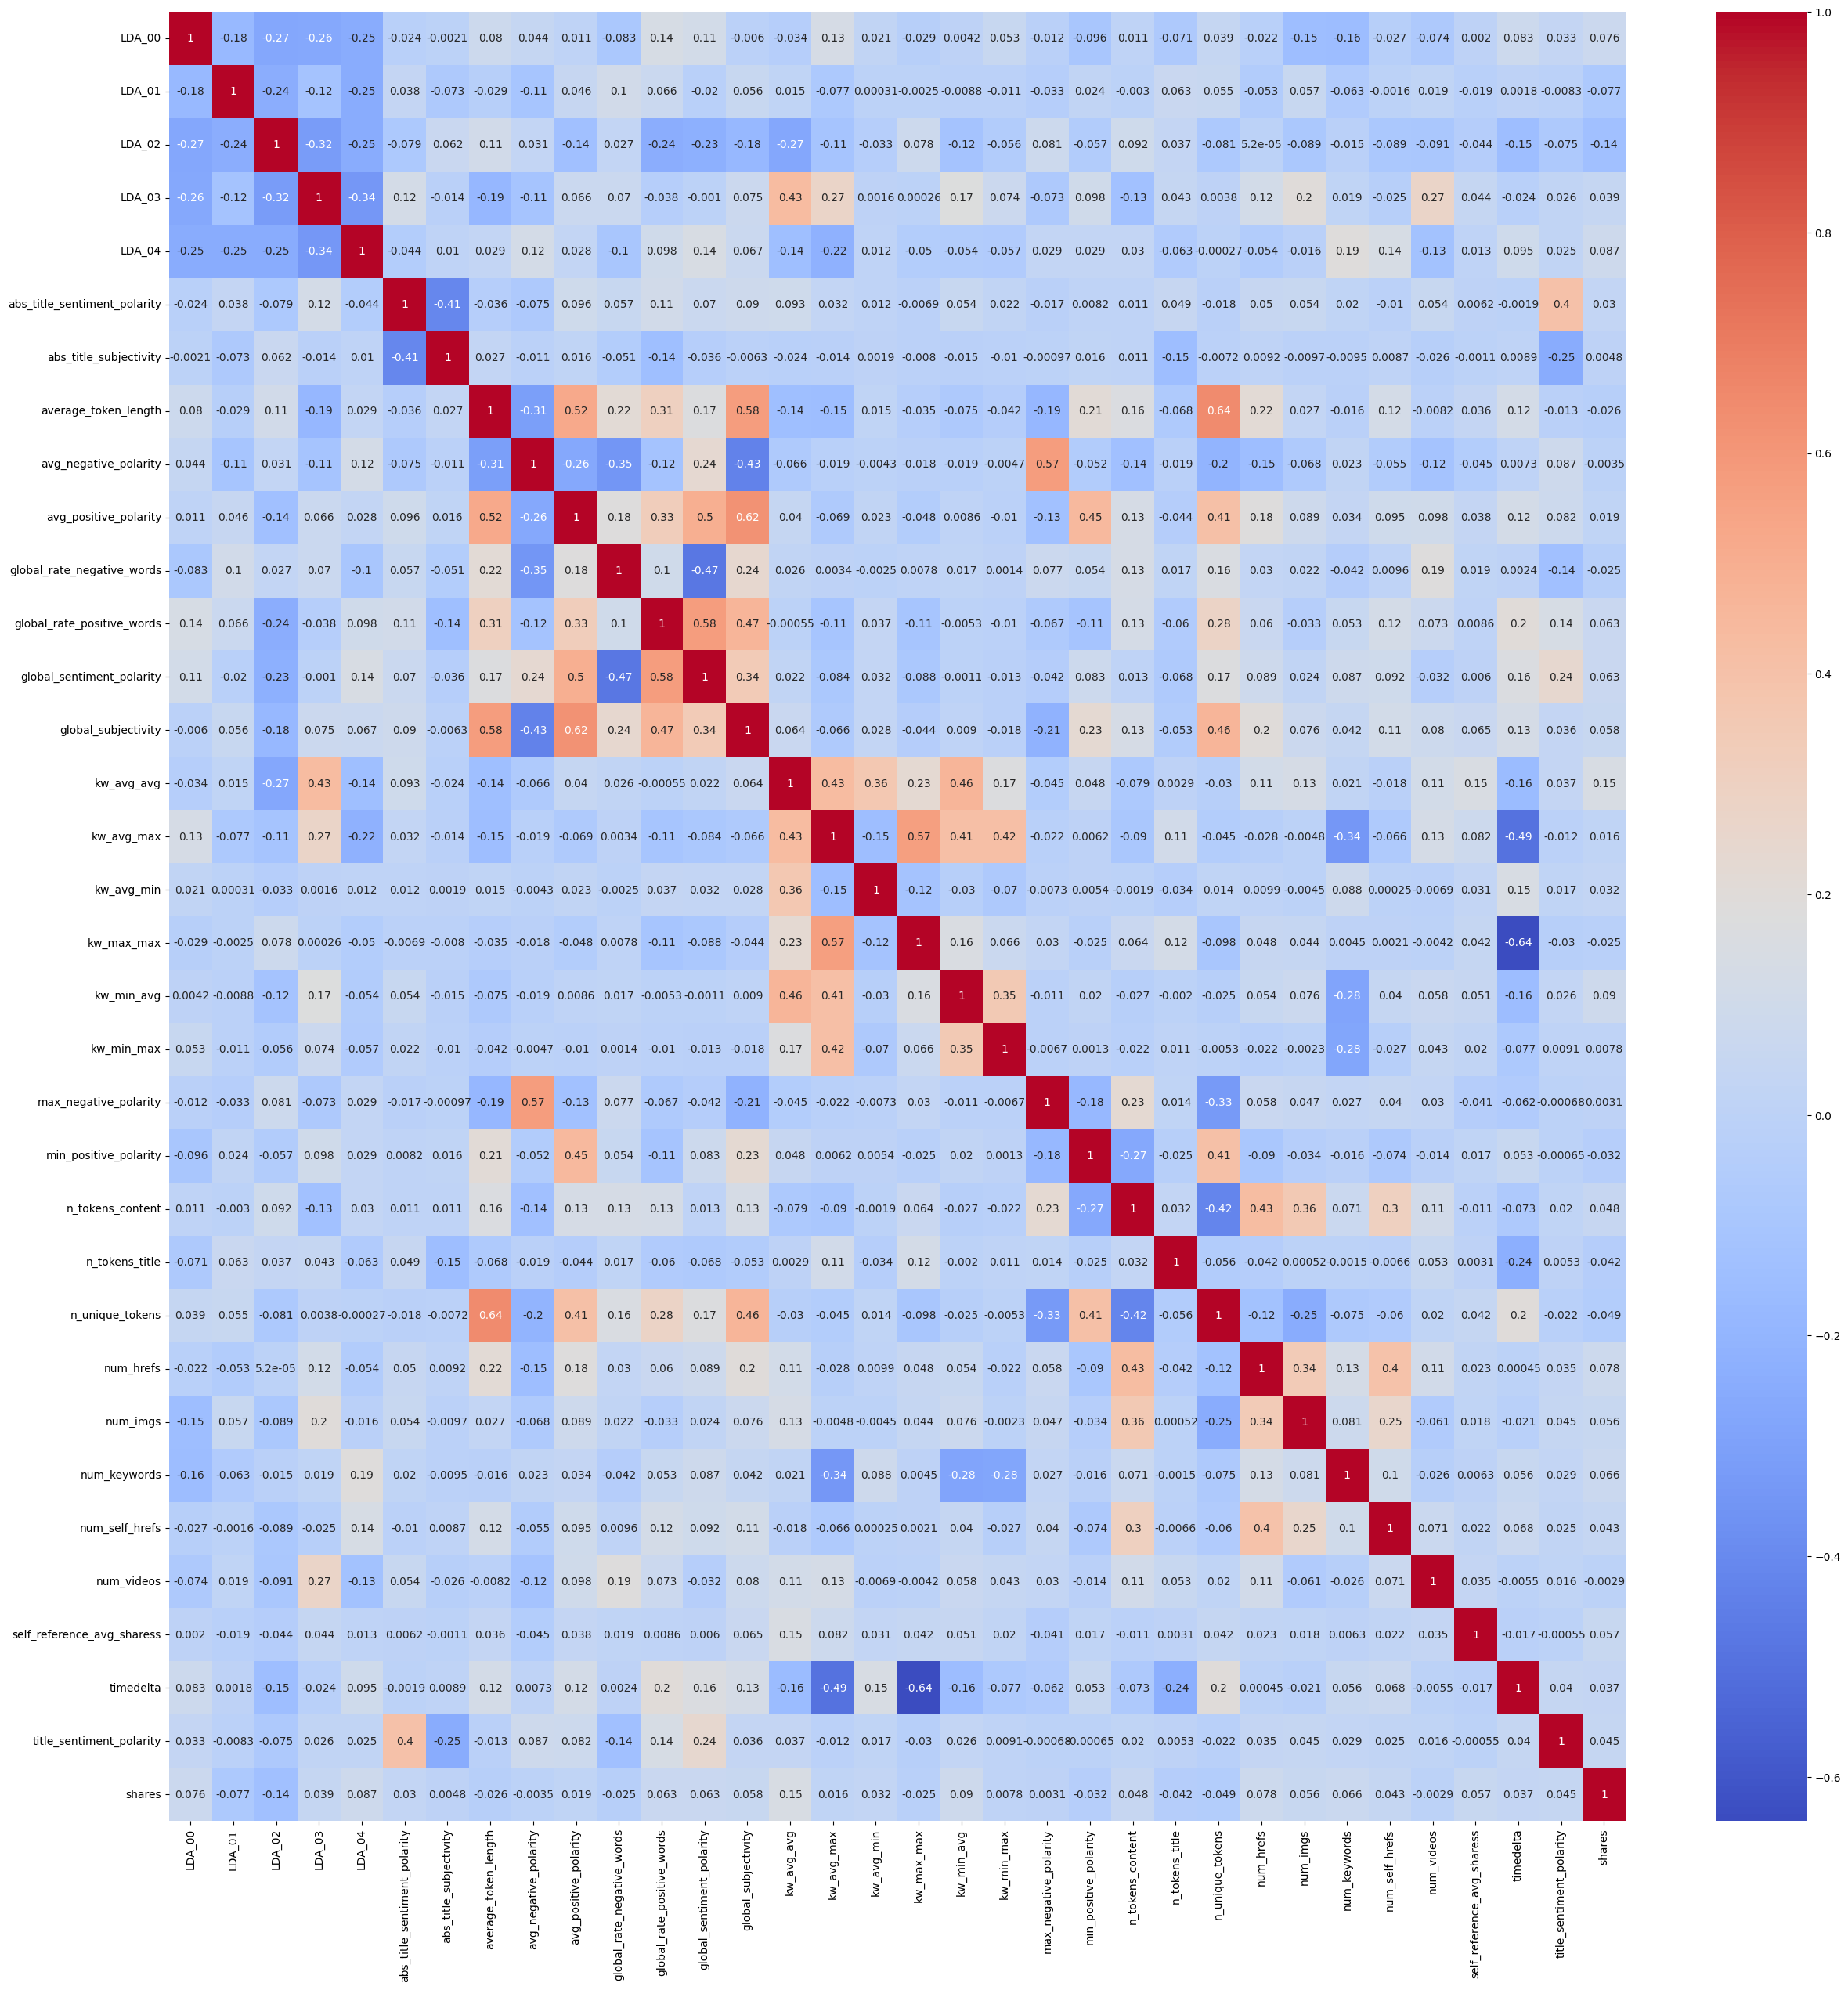

In [32]:
# Según el grafico anterior de correlaciones, eliminaremos alguas columnas con altas correlaciones para disminuir la colinealidad :

columns_continuous_filtered:list = sorted(list(set(columns_continuous) - set(["kw_max_avg",
                                                                              "kw_max_min",
                                                                              "kw_min_min",
                                                                              "min_negative_polarity",
                                                                              "max_positive_polarity",
                                                                              "n_non_stop_unique_tokens",
                                                                              "n_non_stop_words",
                                                                              "rate_negative_words",
                                                                              "rate_positive_words",
                                                                              "self_reference_max_shares",
                                                                              "self_reference_min_shares",
                                                                              "title_subjectivity"
                                                                            ])))

# Matriz de Correlacion de Pearson para relacionar variables numericas, no utilizaremos chi-cuadrado o ANOVA 
# Graficar Correlaciones
plt.figure(figsize=(30,30))
df_formated_sorted_correlation = df_newspopularity_without_outliers[columns_continuous_filtered + column_target].corr(method="pearson")
sns.heatmap(df_formated_sorted_correlation, annot=True, cmap='coolwarm')
plt.show()

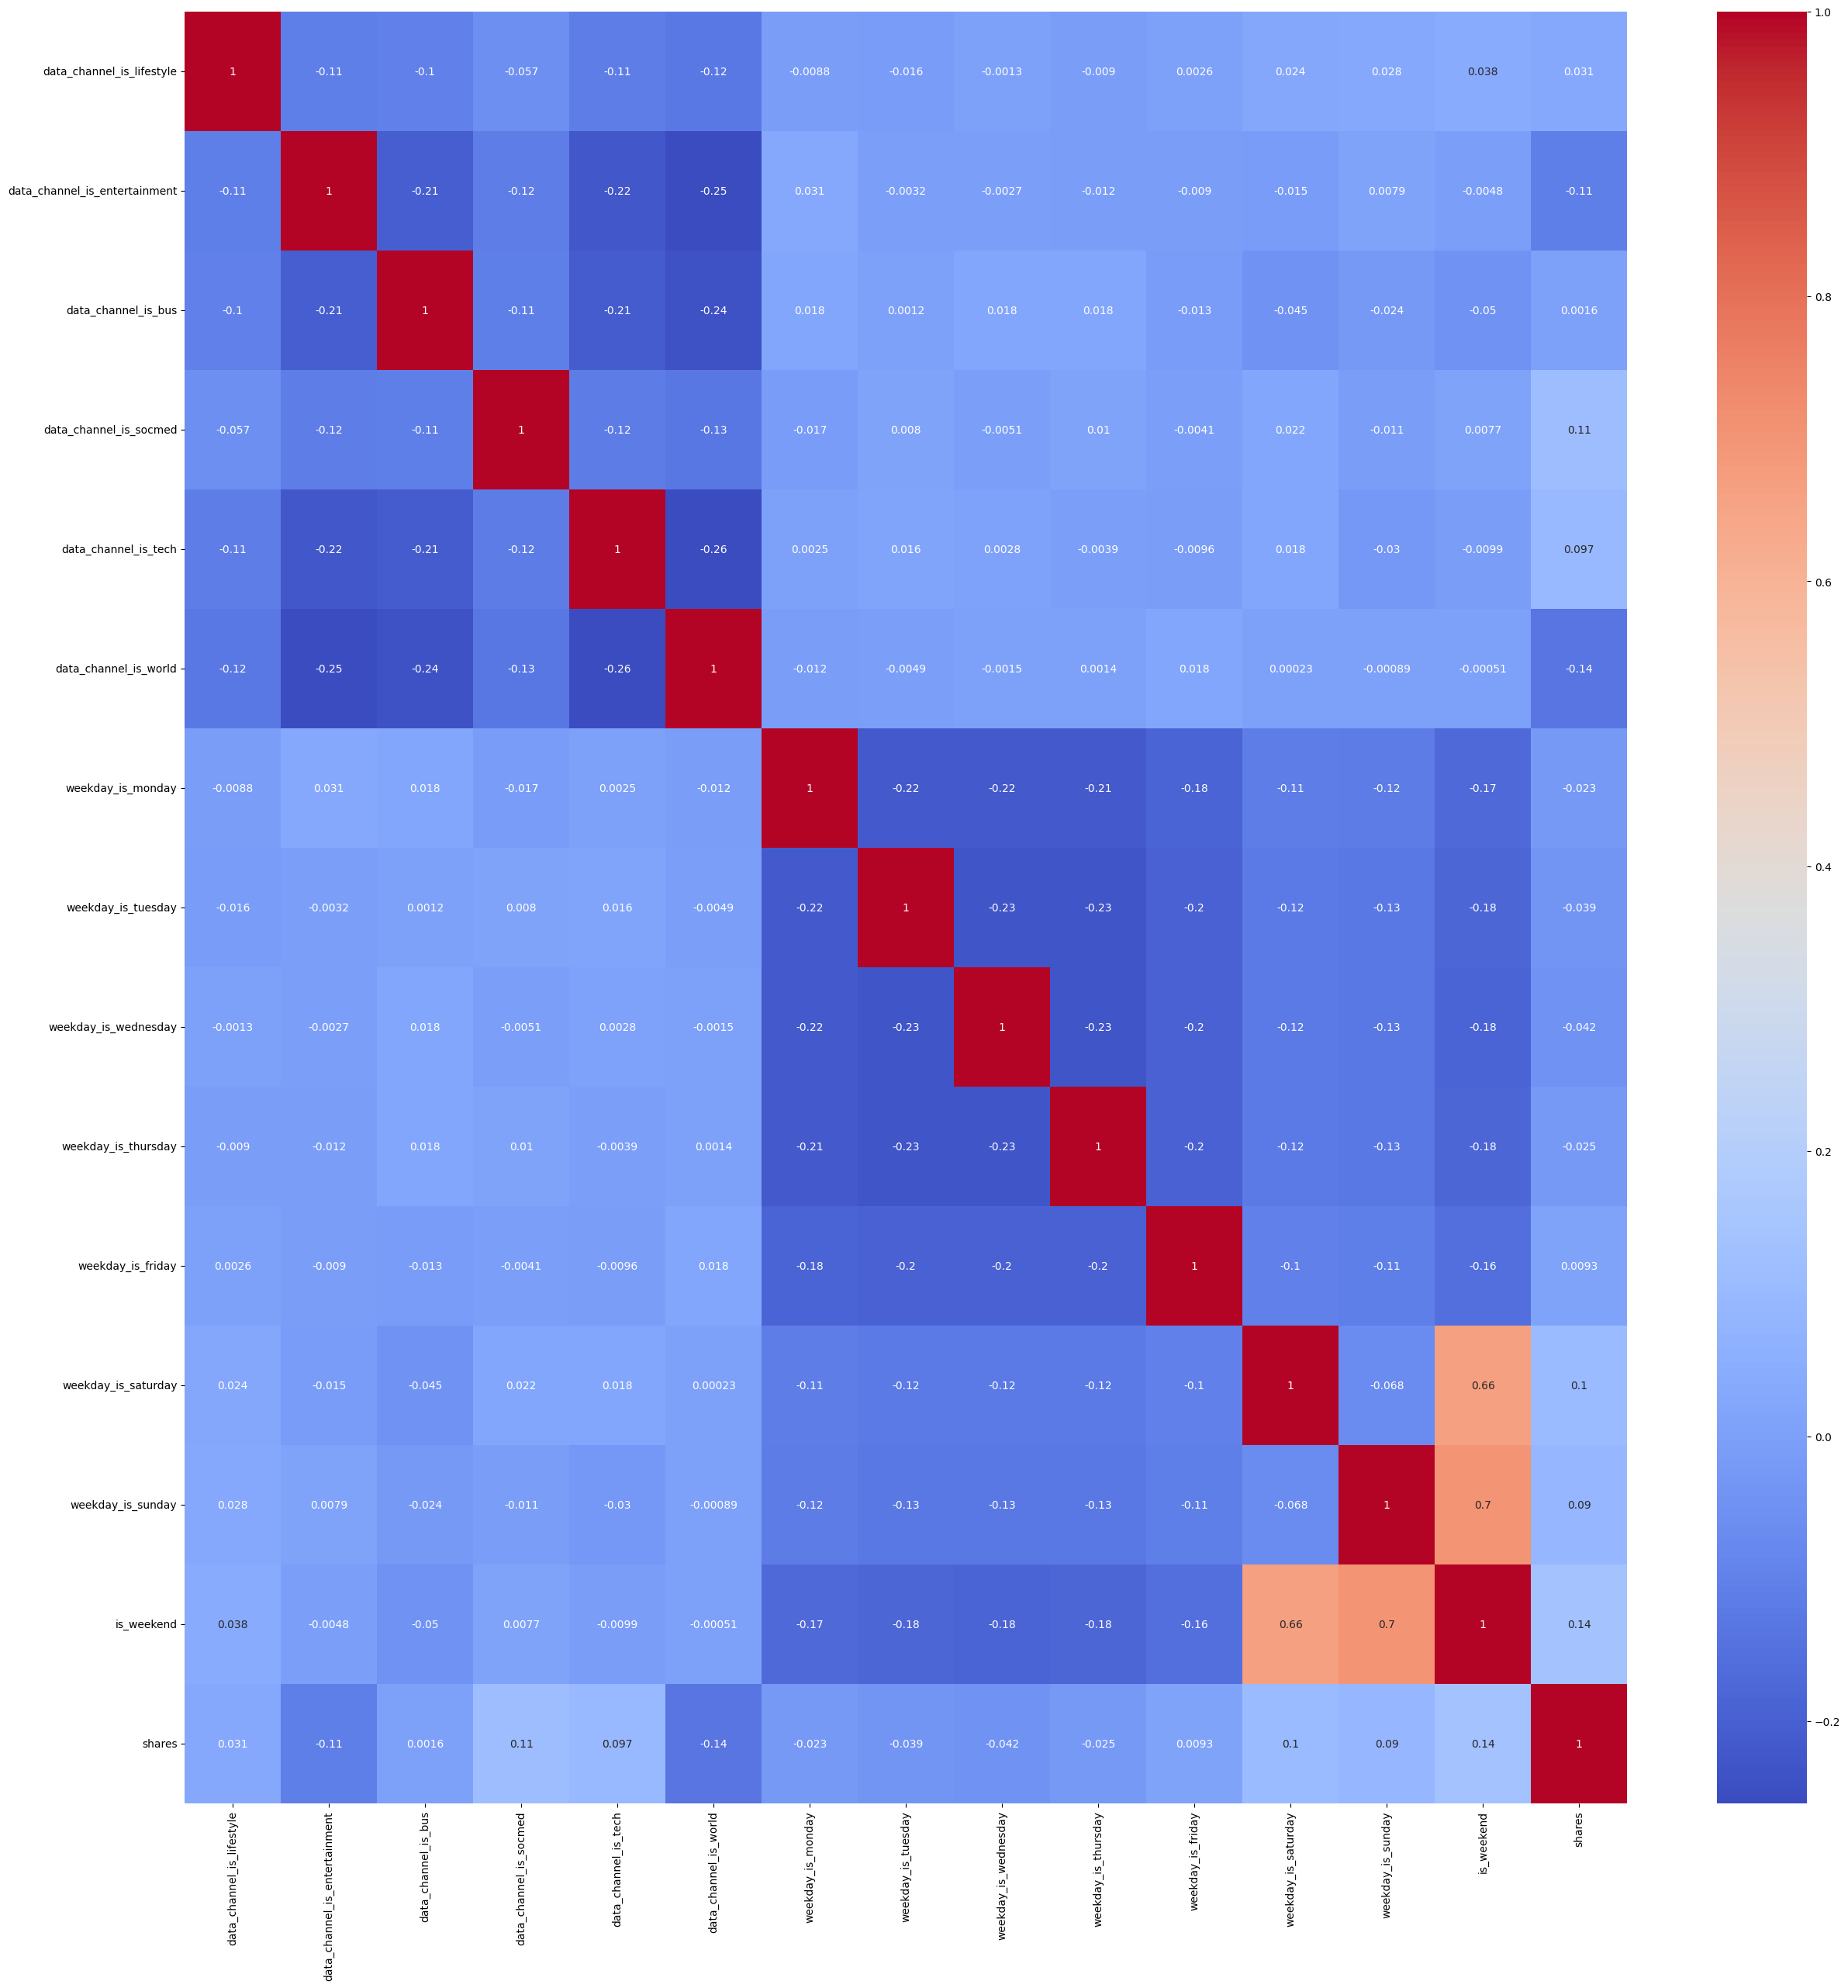

In [33]:
# Matriz de Correlacion de Pearson para relacionar variables categoricas y target, no utilizaremos chi-cuadrado o ANOVA 
# Graficar Correlaciones
plt.figure(figsize=(30,30))
df_formated_sorted_correlation = df_newspopularity_without_outliers[columns_categorical + column_target].corr(method="pearson")
sns.heatmap(df_formated_sorted_correlation, annot=True, cmap='coolwarm')
plt.show()

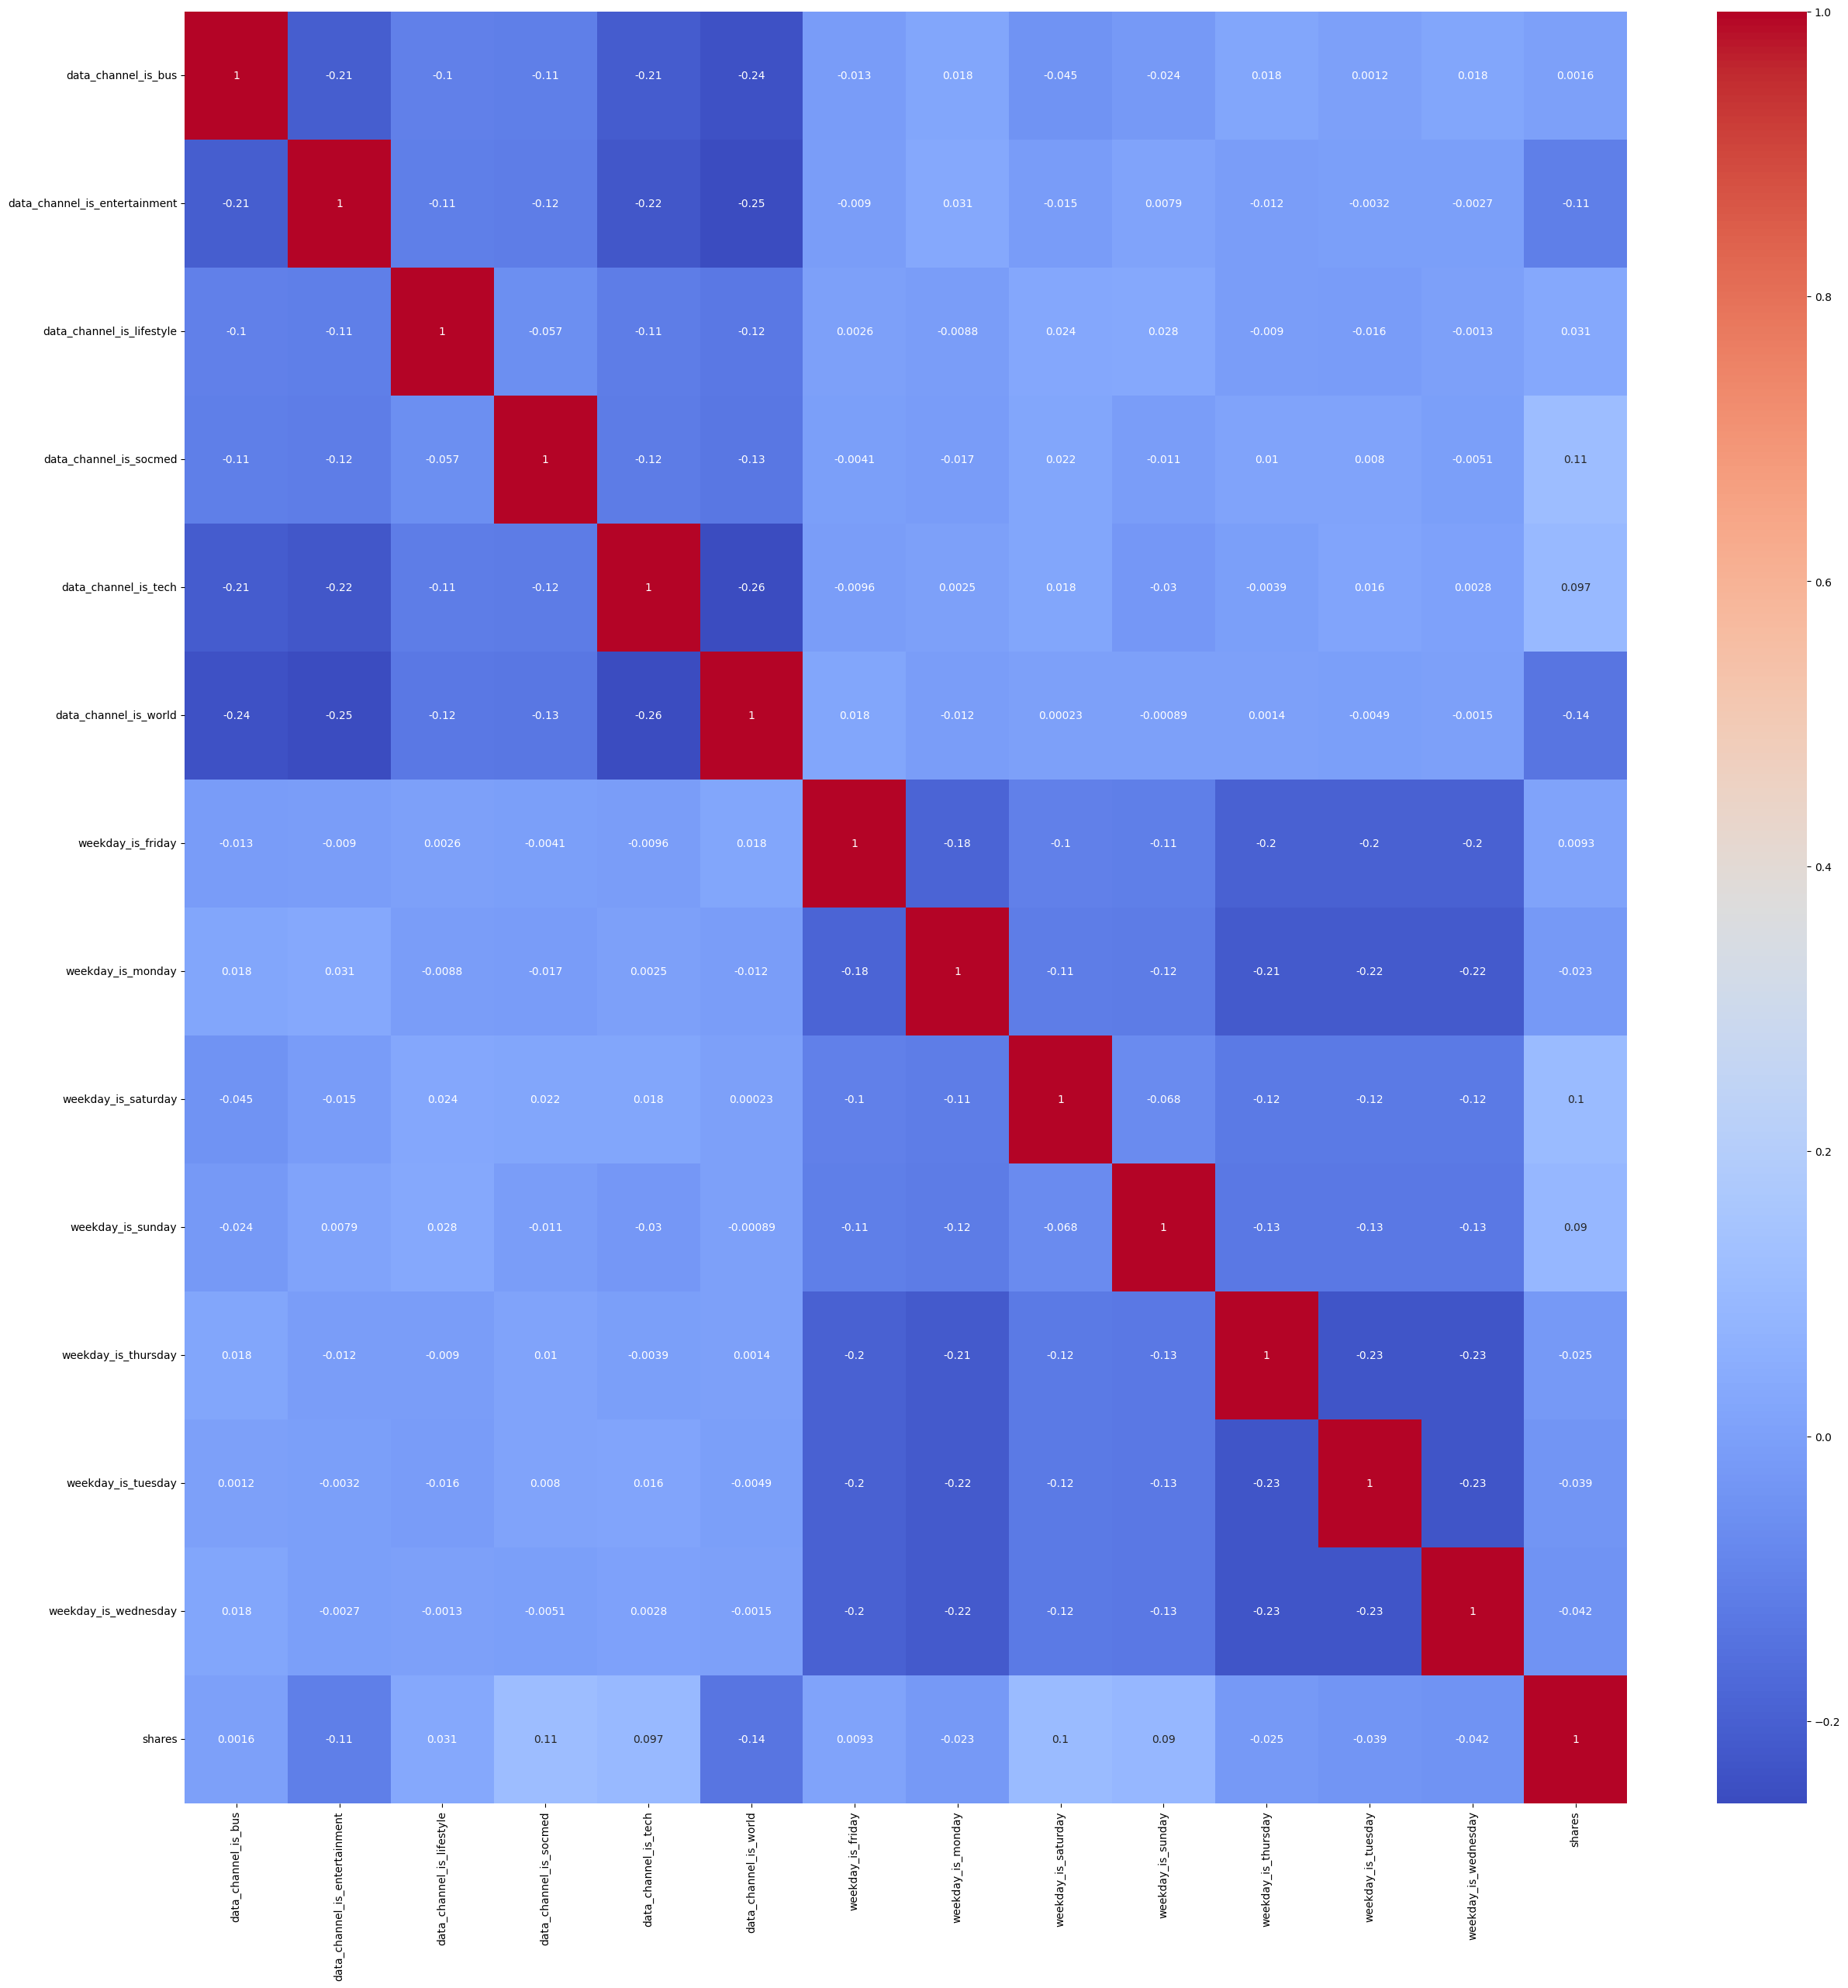

In [34]:
# Según el grafico anterior de correlaciones, eliminaremos alguas columnas con altas correlaciones para disminuir la colinealidad :

columns_categorical_filtered:list = sorted(list(set(columns_categorical) - set(["is_weekend"])))

# Matriz de Correlacion de Pearson para relacionar variables numericas, no utilizaremos chi-cuadrado o ANOVA 
# Graficar Correlaciones
plt.figure(figsize=(30,30))
df_formated_sorted_correlation = df_newspopularity_without_outliers[columns_categorical_filtered + column_target].corr(method="pearson")
sns.heatmap(df_formated_sorted_correlation, annot=True, cmap='coolwarm')
plt.show()

In [35]:
# Principales valores estadisticos para variables continuas

df_newspopularity_without_outliers[columns_continuous_filtered + column_target].describe()

LDA_00        LDA_01        LDA_02        LDA_03        LDA_04  \
count  35103.000000  35103.000000  35103.000000  35103.000000  35103.000000   
mean       0.186301      0.141620      0.226109      0.210438      0.235532   
std        0.263975      0.220558      0.288499      0.287522      0.289478   
min        0.018182      0.018182      0.018182      0.018182      0.018182   
25%        0.025062      0.025013      0.028572      0.025533      0.028575   
50%        0.033414      0.033345      0.040041      0.040000      0.050000   
75%        0.244867      0.150299      0.365945      0.318799      0.403167   
max        0.926994      0.925947      0.919999      0.926534      0.927119   

       abs_title_sentiment_polarity  abs_title_subjectivity  \
count                  35103.000000            35103.000000   
mean                       0.151987                0.341979   
std                        0.221970                0.189265   
min                        0.000000                0.000000   
25%                        0.000000                0.166667   
50%                        0.000000                0.500000   
75%                        0.250000                0.500000   
max                        1.000000                0.500000   

       average_token_length  avg_negative_polarity  avg_positive_polarity  \
count          35103.000000           35103.000000           35103.000000   
mean               4.560363              -0.257774               0.352883   
std                0.817241               0.126191               0.102511   
min                0.000000              -1.000000               0.000000   
25%                4.481877              -0.325469               0.305553   
50%                4.668421              -0.251157               0.357435   
75%                4.858998              -0.185542               0.409334   
max                8.041534               0.000000               1.000000   

       ...  n_unique_tokens     num_hrefs      num_imgs  num_keywords  \
count  ...     35103.000000  35103.000000  35103.000000  35103.000000   
mean   ...         0.531275     10.584423      4.335840      7.199385   
std    ...         0.134254     10.771551      8.091522      1.916833   
min    ...         0.000000      0.000000      0.000000      1.000000   
25%    ...         0.471815      4.000000      1.000000      6.000000   
50%    ...         0.538721      7.000000      1.000000      7.000000   
75%    ...         0.607018     13.000000      3.000000      9.000000   
max    ...         1.000000    187.000000    128.000000     10.000000   

       num_self_hrefs    num_videos  self_reference_avg_sharess     timedelta  \
count    35103.000000  35103.000000                35103.000000  35103.000000   
mean         3.297126      1.187762                 5861.762346    353.669031   
std          3.847926      3.962538                23389.533674    215.444959   
min          0.000000      0.000000                    0.000000      8.000000   
25%          1.000000      0.000000                  952.250000    162.000000   
50%          3.000000      0.000000                 2100.000000    337.000000   
75%          4.000000      1.000000                 4753.954545    545.000000   
max        116.000000     75.000000               843300.000000    731.000000   

       title_sentiment_polarity        shares  
count              35103.000000  35103.000000  
mean                   0.068607   1671.972652  
std                    0.260124   1103.199563  
min                   -1.000000      1.000000  
25%                    0.000000    903.000000  
50%                    0.000000   1300.000000  
75%                    0.136364   2100.000000  
max                    1.000000   5500.000000  

[8 rows x 34 columns]

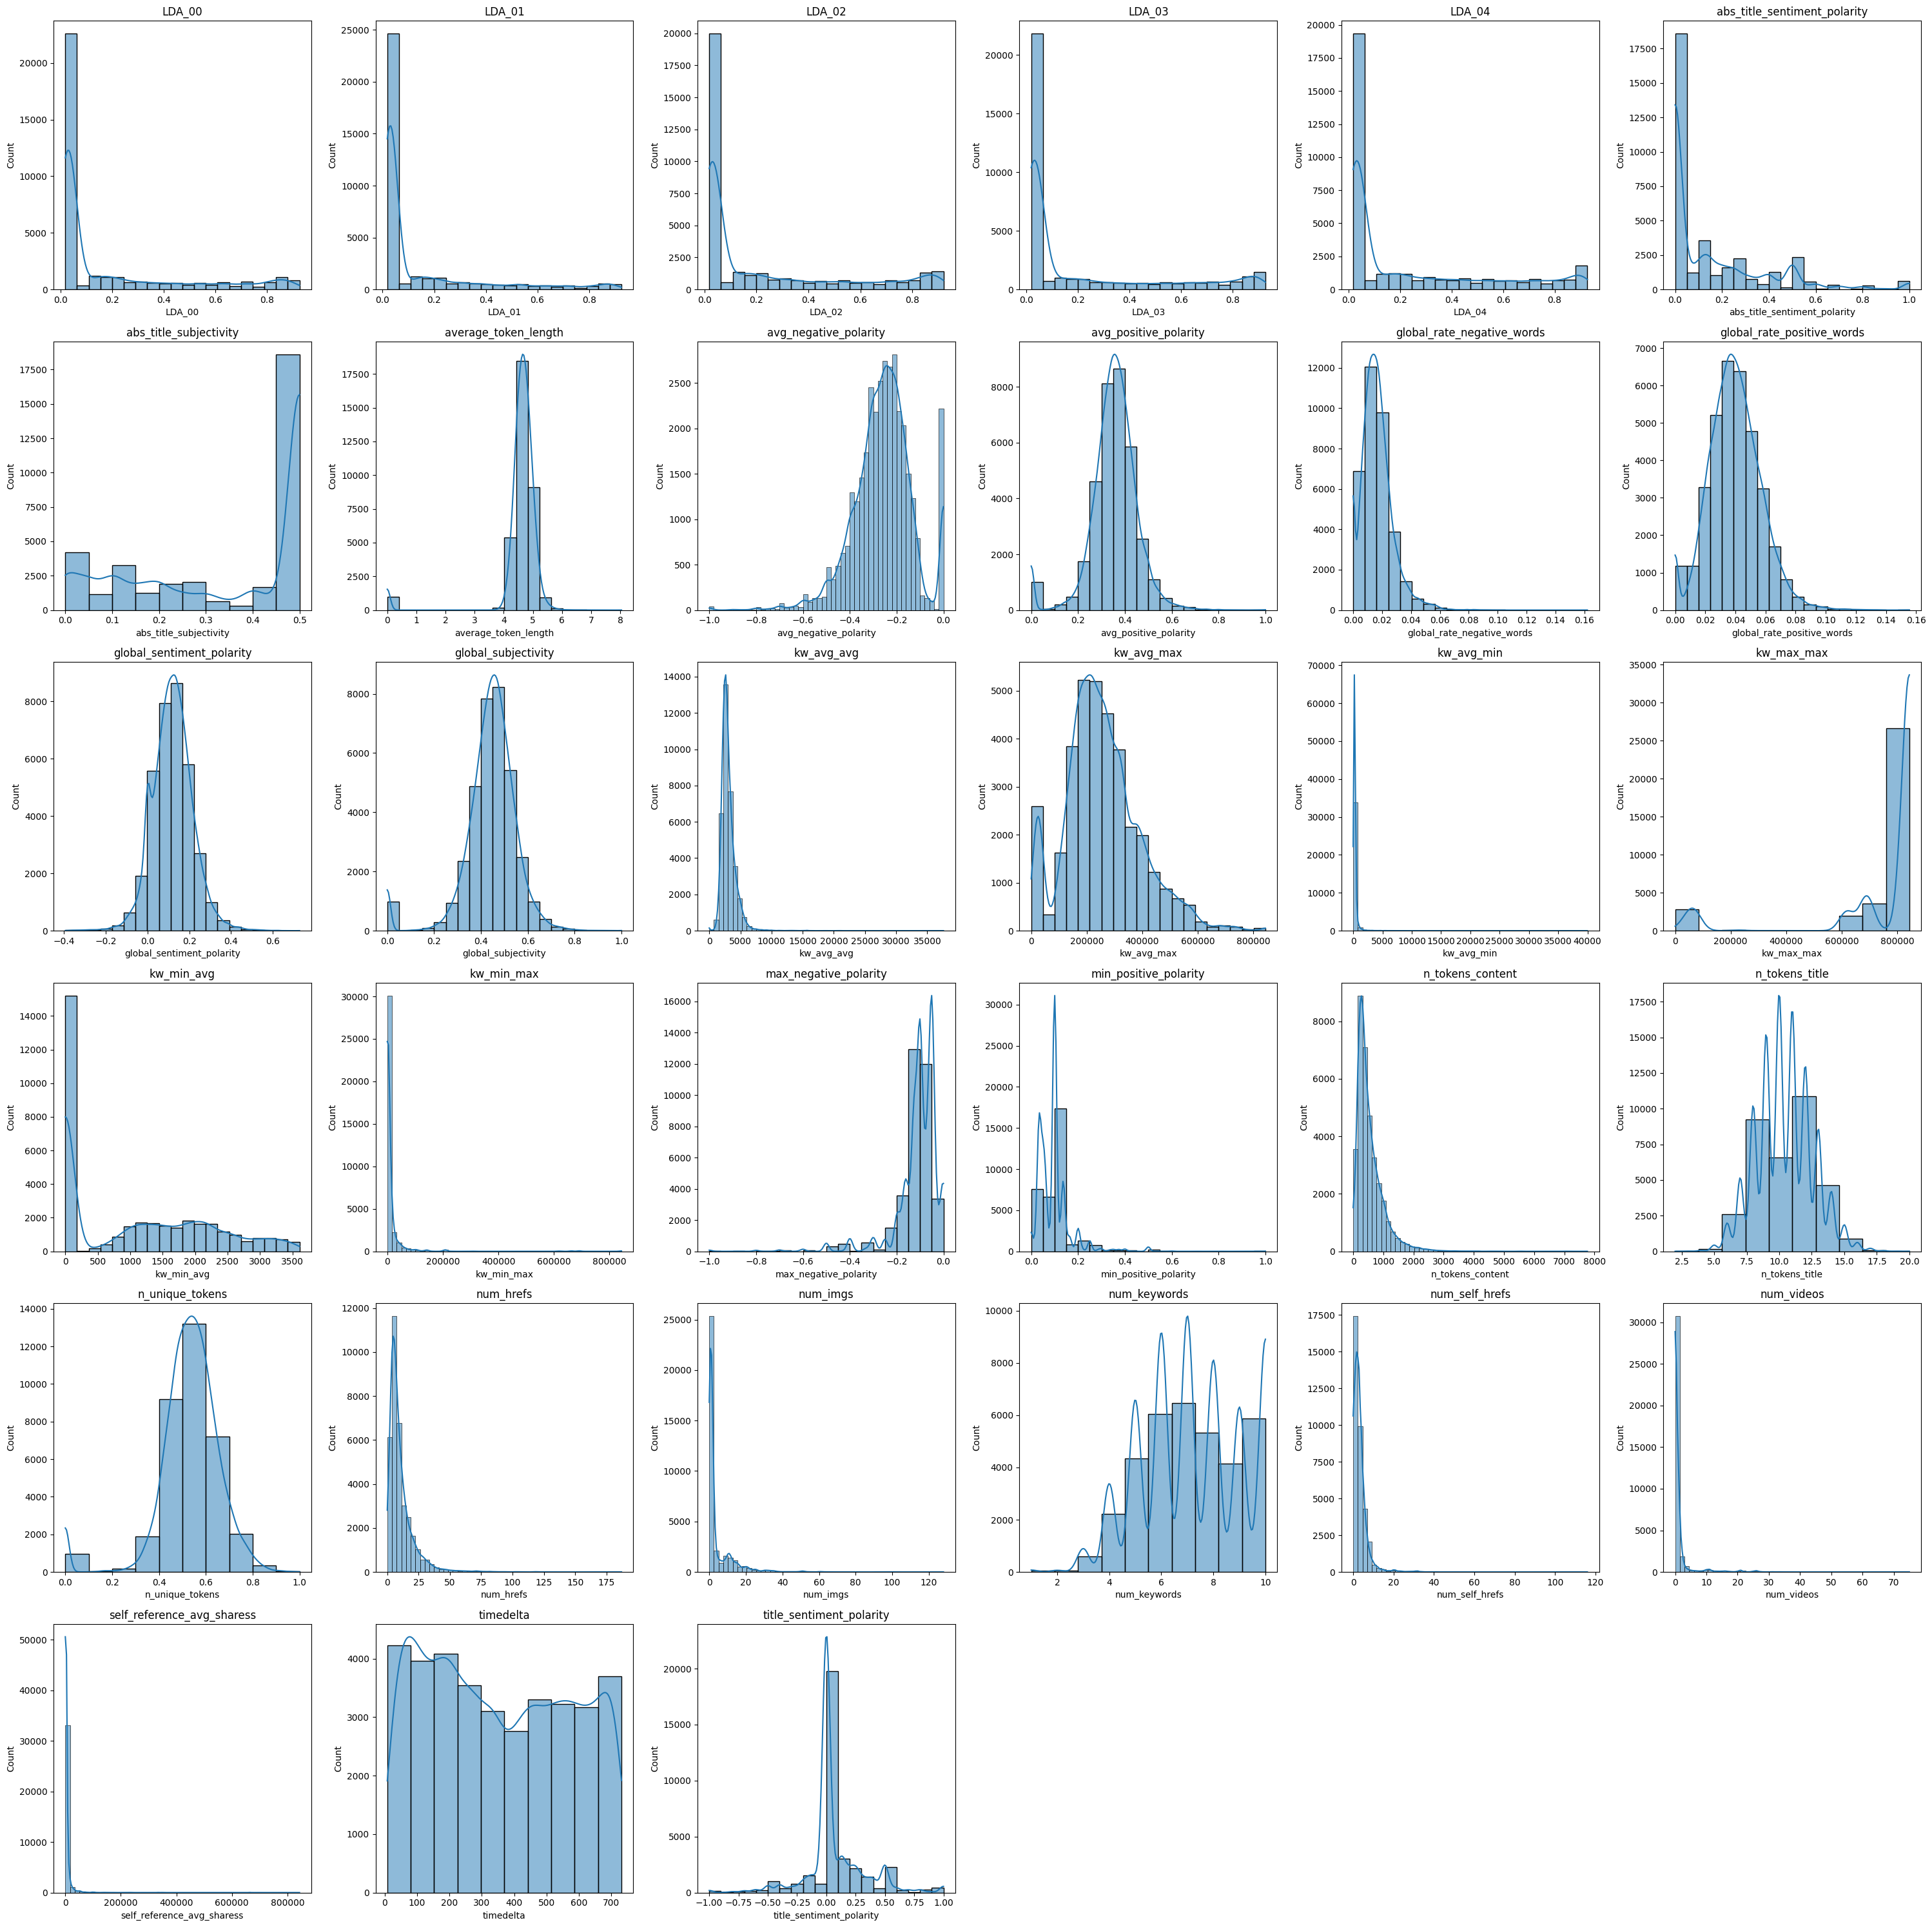

In [36]:
# Graficando histogramas para columnas numericas continuas de variables a utilizar (No categóricas)

plot_df_columns(df= df_newspopularity_without_outliers[columns_continuous_filtered], 
                tipo= "histplot", 
                figsize=(30, 30), 
                kde= True, 
                bins_list=[20, 20, 20, 20, 20, 20, 
                           10, 20, 50, 20, 20, 20, 
                           20, 20, 50, 20, 50, 10, 
                           20, 50, 20, 20, 50, 10, 
                           10, 50, 50, 10, 50, 50, 
                           50, 10, 20], 
                stat= "count")

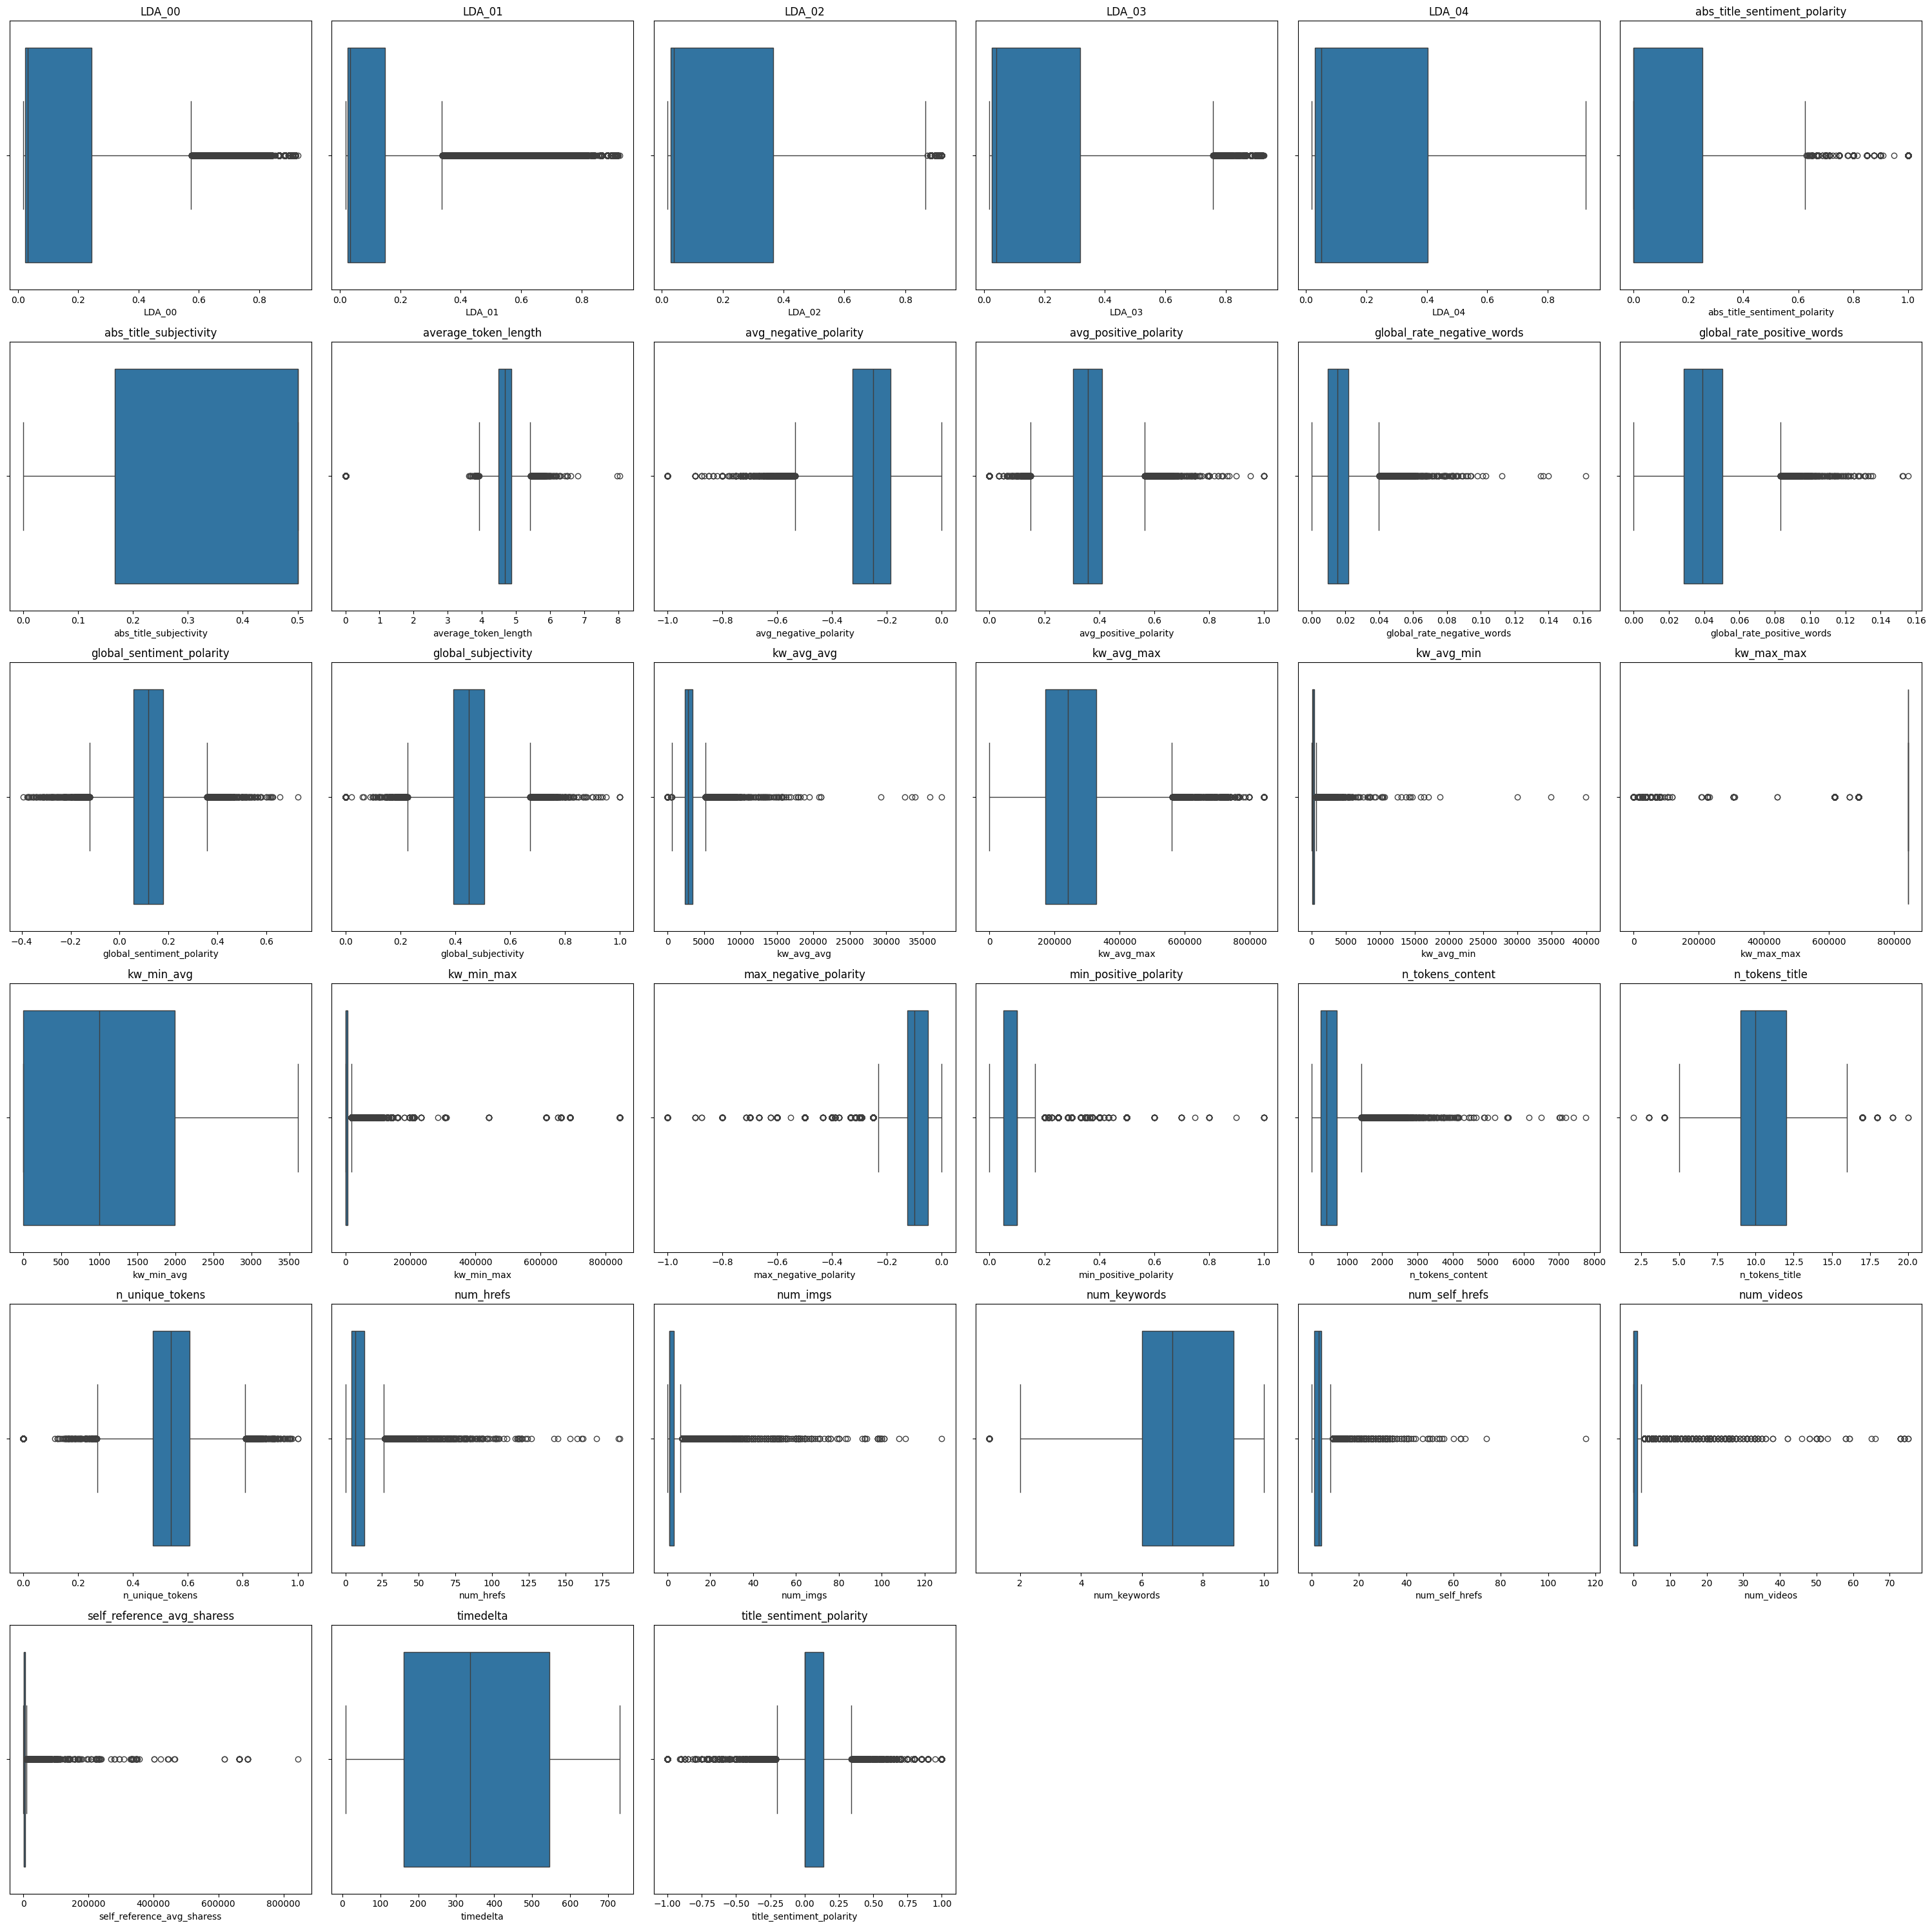

In [37]:
# Graficando boxplot para columnas numericas continuas de variables a utilizar (No categóricas)

plot_df_columns(df= df_newspopularity_without_outliers[columns_continuous_filtered], 
                tipo= "boxplot", 
                figsize=(30, 30), 
                kde= True, 
                bins_list=[20, 20, 20, 20, 20, 20, 
                           10, 20, 50, 20, 20, 20, 
                           20, 20, 50, 20, 50, 10, 
                           20, 50, 20, 20, 50, 10, 
                           10, 50, 50, 10, 50, 50, 
                           50, 10, 20], 
                stat= "count")

## Actividad 7

Escoge cuatro variables numéricas y analiza su distribución. Luego normaliza todas las variables numéricas y divide los datos en entrenamiento y test (33%).

In [268]:
# Determinar features para X , primero continuas luego categoricas
X_features_sorted = columns_continuous_filtered + columns_categorical_filtered

# Definicion de X
X_newspopularity = df_newspopularity_without_outliers[X_features_sorted]

# Definicion de y
y_newspopularity = df_newspopularity_without_outliers[column_target]

# Generar Datos de Entrenamiento y Testeo
X_newspopularity_train, X_newspopularity_test, y_newspopularity_train, y_newspopularity_test = train_test_split(X_newspopularity, y_newspopularity, test_size=0.33, random_state=42)

# Resetear indices en datos
X_newspopularity_train = X_newspopularity_train.reset_index(drop=True)
y_newspopularity_train = y_newspopularity_train.reset_index(drop=True)
y_newspopularity_train = y_newspopularity_train.to_numpy().reshape(-1, 1)

X_newspopularity_test = X_newspopularity_test.reset_index(drop=True)
y_newspopularity_test = y_newspopularity_test.reset_index(drop=True)
y_newspopularity_test = y_newspopularity_test.to_numpy().reshape(-1, 1)


In [269]:
# Estandarizando variables continuas
# X_features_sorted = columns_continuous_filtered + columns_categorical_filtered

preprocessor = ColumnTransformer(
    transformers=[
        ('features_continuous_sorted', StandardScaler(), columns_continuous_filtered)
    ],
    remainder='passthrough'  # deja pasar columnas no mencionadas
)

preprocessor.fit(X_newspopularity_train)
X_newspopularity_train_transformed = preprocessor.transform(X_newspopularity_train)
X_newspopularity_test_transformed = preprocessor.transform(X_newspopularity_test)

# Escalando target
target_scaler = StandardScaler()
target_scaler.fit(y_newspopularity_train)
y_newspopularity_train_transformed = target_scaler.transform(y_newspopularity_train)
y_newspopularity_test_transformed = target_scaler.transform(y_newspopularity_test)

In [270]:
# Para observar datos transformados
df_X_newspopularity_train_transformed = pd.DataFrame(X_newspopularity_train_transformed, columns = X_features_sorted)
df_X_newspopularity_train_transformed

LDA_00    LDA_01    LDA_02    LDA_03    LDA_04  \
0      0.676336 -0.492796  1.074932 -0.614373 -0.701393   
1      0.081475 -0.492803 -0.663326 -0.614375  1.565371   
2      1.049814 -0.551522  0.097564 -0.657452  0.013519   
3     -0.612707 -0.530595 -0.253091 -0.189738  1.401642   
4     -0.582438  0.267062  0.492915 -0.614367  0.448279   
...         ...       ...       ...       ...       ...   
23514 -0.135389 -0.530615  1.910035 -0.643423 -0.730124   
23515  0.802623  1.166330 -0.545196 -0.498171 -0.586451   
23516 -0.582451  0.515186 -0.663365  1.516088 -0.701362   
23517 -0.613899  1.170089  1.047037 -0.643112 -0.730125   
23518 -0.624378 -0.543219  2.389696 -0.653107 -0.739691   

       abs_title_sentiment_polarity  abs_title_subjectivity  \
0                         -0.687520                0.837687   
1                          1.001437               -1.134737   
2                         -0.687520                0.837687   
3                         -0.612456               -0.301936   
4                         -0.593690               -1.463475   
...                             ...                     ...   
23514                     -0.687520                0.837687   
23515                      0.438451               -0.652589   
23516                     -0.687520               -1.529222   
23517                     -0.073354               -1.553130   
23518                      0.213257                0.311707   

       average_token_length  avg_negative_polarity  avg_positive_polarity  \
0                  0.392607              -0.147662              -0.574172   
1                  0.082047               0.506787              -0.150751   
2                  0.611114              -0.140314              -0.584631   
3                  0.514101              -1.038264               0.477216   
4                  0.197035               0.120416               0.377000   
...                     ...                    ...                    ...   
23514             -5.478626               2.034754              -3.430634   
23515              0.098056              -0.249312              -1.064850   
23516             -0.083965              -0.544465               0.652703   
23517              0.125499               0.222687              -0.192728   
23518             -0.228916               0.915203               0.719277   

       ...  data_channel_is_socmed  data_channel_is_tech  \
0      ...                     0.0                   0.0   
1      ...                     0.0                   0.0   
2      ...                     1.0                   0.0   
3      ...                     0.0                   0.0   
4      ...                     0.0                   1.0   
...    ...                     ...                   ...   
23514  ...                     0.0                   0.0   
23515  ...                     1.0                   0.0   
23516  ...                     0.0                   0.0   
23517  ...                     0.0                   0.0   
23518  ...                     0.0                   0.0   

       data_channel_is_world  weekday_is_friday  weekday_is_monday  \
0                        0.0                0.0                1.0   
1                        0.0                0.0                1.0   
2                        0.0                0.0                1.0   
3                        0.0                0.0                0.0   
4                        0.0                0.0                0.0   
...                      ...                ...                ...   
23514                    1.0                0.0                0.0   
23515                    0.0                0.0                0.0   
23516                    0.0                0.0                0.0   
23517                    0.0                0.0                0.0   
23518                    1.0                1.0                0.0   

       weekday_is_saturday  weekday_is_sunday  weekday_i

In [271]:
# Para observar datos transformados
df_X_newspopularity_test_transformed = pd.DataFrame(X_newspopularity_test_transformed, columns = X_features_sorted)
df_X_newspopularity_test_transformed

LDA_00    LDA_01    LDA_02    LDA_03    LDA_04  \
0      0.617530 -0.492555 -0.662509  0.657867 -0.183883   
1      2.688113 -0.530610 -0.692312 -0.643423 -0.730120   
2     -0.632767 -0.553301  1.725388 -0.660853 -0.058138   
3      0.448216 -0.462452  1.206127 -0.584240 -0.675886   
4     -0.597336 -0.513056  1.760606 -0.093055 -0.717655   
...         ...       ...       ...       ...       ...   
11579 -0.624382  1.882199  0.530285 -0.652941 -0.739706   
11580  1.653583 -0.552991 -0.709711 -0.660853  0.266631   
11581 -0.582438 -0.488786 -0.663358  2.287416 -0.701386   
11582  1.686714 -0.462284  0.066938 -0.589277 -0.673308   
11583  2.455300 -0.462429 -0.634631 -0.590845 -0.678404   

       abs_title_sentiment_polarity  abs_title_subjectivity  \
0                          0.213257               -0.214273   
1                          1.114034               -1.792212   
2                         -0.687520                0.837687   
3                         -0.687520                0.837687   
4                          1.564423               -1.792212   
...                             ...                     ...   
11579                      0.213257               -0.214273   
11580                      1.564423               -1.792212   
11581                     -0.319021               -1.648763   
11582                     -0.687520                0.837687   
11583                      1.564423               -0.477263   

       average_token_length  avg_negative_polarity  avg_positive_polarity  \
0                  0.061484              -0.145213              -0.304582   
1                 -0.074210               0.183007               0.482364   
2                  0.189387               0.628691              -0.540253   
3                  0.099133               0.976613               3.224628   
4                  0.179339               0.145676               0.962624   
...                     ...                    ...                    ...   
11579             -0.143505               0.194029              -0.266073   
11580              0.597192               0.786478               0.813042   
11581              0.342993              -0.930246               3.115670   
11582             -0.022021              -0.443427               0.784217   
11583              0.153535               0.373142              -1.018725   

       ...  data_channel_is_socmed  data_channel_is_tech  \
0      ...                     1.0                   0.0   
1      ...                     0.0                   0.0   
2      ...                     0.0                   0.0   
3      ...                     1.0                   0.0   
4      ...                     1.0                   0.0   
...    ...                     ...                   ...   
11579  ...                     0.0                   0.0   
11580  ...                     0.0                   0.0   
11581  ...                     0.0                   0.0   
11582  ...                     1.0                   0.0   
11583  ...                     0.0                   0.0   

       data_channel_is_world  weekday_is_friday  weekday_is_monday  \
0                        0.0                0.0                0.0   
1                        0.0                0.0                0.0   
2                        1.0                0.0                1.0   
3                        0.0                1.0                0.0   
4                        0.0                0.0                0.0   
...                      ...                ...                ...   
11579                    0.0                1.0                0.0   
11580                    0.0                0.0                0.0   
11581                    0.0                1.0                0.0   
11582                    0.0                0.0                0.0   
11583                    0.0                0.0                0.0   

       weekday_is_saturday  weekday_is_sunday  weekday_i

## Actividad 8

Entrena un modelo de Random Forest usando búsqueda de grilla. La búsqueda debe considerar:

- para n_estimators, valores entre 100 y 300 para 10 valores
- para max_depth, valores entres 2 y 15 para 10 valores
- para max_features, buscar para ‘sqrt’ y ‘log2’.

En la búsqueda de grilla considera cinco fold. Muestra los mejores hiper parámetros encontrados por la búsqueda de grilla. Calcula dos métricas sobre el conjunto de test, para evaluar el modelo.

In [272]:
# Modelo base RandomForestRegressor

rf_reg = RandomForestRegressor(bootstrap=True, random_state=42, n_jobs=-1)

# Definir la grilla de hiperparámetros
param_grid_rf_reg = {
    'n_estimators': np.linspace(100, 300, 10).astype(int), 
    'max_depth': np.linspace(2, 15, 10).astype(int),  
    'max_features': ['sqrt', 'log2']
}

# Configurar la búsqueda por grilla (GridSearchCV)
grid_rf_reg = GridSearchCV(
    estimator = rf_reg,
    param_grid = param_grid_rf_reg,
    scoring = 'r2',         # métrica a optimizar
    cv = 5,                 # validación cruzada
    n_jobs = -1,            # usa todos los núcleos disponibles
    verbose = 0
)

# Entrenar el modelo con búsqueda de hiperparámetros
grid_rf_reg.fit(X_newspopularity_train, y_newspopularity_train)

# Mejor modelo encontrado
best_rf_reg = grid_rf_reg.best_estimator_

# Predicciones
y_pred_best_rf_reg = best_rf_reg.predict(X_newspopularity_test)

# Mejores parametros
best_params_rf_reg = grid_rf_reg.best_params_

c:\Users\pro33\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [274]:
df_rf_reg_results = model_evaluation_regressor(y_newspopularity_test, y_pred_best_rf_reg, model_name = "rf_reg")
df_rf_reg_results

MAE         RMSE        R2
Model                                    
rf_reg  761.252326  1019.310672  0.139631

## Actividad 9

Entrena un modelo de red neuronal Fully Connected con al menos dos capas ocultas y aplicando regularización Dropout. Utiliza en cada capa una cantidad de neuronas
mayor a 300. Calcula las mismas métricas usadas en el modelo anterior, sobre el conjunto de test, para evaluar el modelo.

In [276]:
input_length = X_newspopularity_train_transformed.shape[1]
input_length

46

In [78]:
# Creamos el modelo

class Model_FullyConnected_Sequential:

    def __init__(self,
                optimizer_name:str,
                learning_rate:float,
                loss_name:str,
                metrics:list[str],
                inputlength:int,
                dense_neurons_list:list[int],
                dense_activation_list:list[str],
                dense_kernelinitializer_list:list[str],
                dense_biasinitializer_list:list[str],
                dense_dropout_list:list[float|None],
                dense_batchnormalization_list:list[bool]
                 ):

        self.optimizer_name = optimizer_name
        self.learning_rate = learning_rate
        self.loss_name = loss_name
        self.metrics = metrics
        self.inputlength = inputlength
        self.dense_neurons_list = dense_neurons_list
        self.dense_activation_list = dense_activation_list
        self.dense_kernelinitializer_list = dense_kernelinitializer_list
        self.dense_biasinitializer_list = dense_biasinitializer_list
        self.dense_dropout_list = dense_dropout_list
        self.dense_batchnormalization_list = dense_batchnormalization_list

        # Sequential Model
        self.model = Sequential()

        # Building Model
        self.__model_contructor()


    # Model constructor private method
    def __model_contructor(self):

        # Optimizer
        if self.optimizer_name == "adam":
            optimizer = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        else:
            optimizer = tf.keras.optimizers.SGD(learning_rate=self.learning_rate)

        # Loss
        if self.loss_name == "mse":
            loss = tf.keras.losses.MeanSquaredError()
        elif self.loss_name == "mae":
            loss = tf.keras.losses.MeanAbsoluteError()
        elif self.loss_name == "categorical_crossentropy":
            loss = tf.keras.losses.CategoricalCrossentropy()
        elif self.loss_name == "binary_crossentropy":
            loss = tf.keras.losses.BinaryCrossentropy()
        else:
            loss = tf.keras.losses.MeanSquaredError()

        # Input Layer
        self.model.add(Input(shape=(self.inputlength,)))

        # Dense Layers
        for i in range(len(self.dense_neurons_list)):

            # Dense Layer
            self.model.add(Dense(units=self.dense_neurons_list[i],
                                activation=self.dense_activation_list[i],
                                kernel_initializer=self.dense_kernelinitializer_list[i],
                                bias_initializer=self.dense_biasinitializer_list[i]))

            # BatchNormalization
            if self.dense_batchnormalization_list[i] == True:
                self.model.add(BatchNormalization())

            # Dropout
            if isinstance(self.dense_dropout_list[i], float):
                self.model.add(Dropout(rate=self.dense_dropout_list[i]))

        self.model.compile(optimizer=optimizer, loss=loss, metrics=self.metrics)
        self.model.summary()

    # Return model method
    def return_model(self):
        return self.model

    # Fit and evaluate method
    def fit_evaluate(self, X_train, y_train, X_test, y_test, epochs:int, batch_size:int, early_stopping:bool=True):

        # Callbacks
        if early_stopping == True:
            callbacks = [EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)]
        else:
            callbacks = []

        # Fit
        self.history = self.model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=epochs, batch_size=batch_size, verbose=0, callbacks=callbacks)
        self.history_results = self.history.history

        # Evaluate
        loss_test, metrics_test = self.model.evaluate(X_test, y_test)

        return self.model, self.history, self.history_results, loss_test, metrics_test

    # Show evolution results
    def show_evolution_loss(self):

        # Show Loss
        plt.plot(self.history_results['loss'], label='train_loss')
        plt.plot(self.history_results['val_loss'], label='val_loss')
        plt.legend()
        plt.title("Lost by epochs")
        plt.xlabel("Epochs")
        plt.ylabel("Loss")
        plt.show()

    # Show evolution results
    def show_evolution_metric(self, fig_size:tuple):

        n = len(self.metrics)

        # Calculate grid (as square as possible)
        ncols = math.ceil(math.sqrt(n))
        nrows = math.ceil(n / ncols)

        # Create figure
        fig, axes = plt.subplots(nrows, ncols, figsize=fig_size)

        # Ensure that axes is a 1D array
        if isinstance(axes, np.ndarray):
            axes = axes.flatten()
        else:
            axes = np.array([axes])

        # Show metrics
        for i, metric in enumerate(self.metrics):
            ax = axes[i]

            if metric in self.history_results:

                ax.plot(self.history_results[metric], label=f"train_{metric}")
                ax.plot(self.history_results[f"val_{metric}"], label=f"val_{metric}")
                ax.set_title(f"{metric} by epoch")
                ax.set_xlabel("epochs")
                ax.set_ylabel(metric)
                ax.legend()
                ax.grid(True)

        # Delete empty subplots
        for j in range(i + 1, len(axes)):
            fig.delaxes(axes[j])

        plt.tight_layout()
        plt.show()

    # Predict method
    def predict(self, X_pred, classification_type:str|None):

        # Prediction probability
        y_proba_pred = self.model.predict(X_pred)

        if classification_type == "binary":

            y_pred = (y_proba_pred >= 0.5).astype(int)

        elif classification_type == "multiple_classes":

            y_pred = np.argmax(y_proba_pred, axis=1)
        
        else:
            
            y_pred = y_proba_pred

        return y_proba_pred, y_pred


In [166]:
# Model configuration data
model_02_config = {
    "optimizer_name": "adam",
    "learning_rate": 0.00001,
    "loss_name": "mse",
    "metrics": ["mse"],
    "inputlength": input_length,
    "dense_neurons_list": [400, 300, 20, 1],
    "dense_activation_list": ["relu", "relu", "relu", "linear"],
    "dense_kernelinitializer_list": ["he_normal", "he_normal", "he_normal", "glorot_uniform"],
    "dense_biasinitializer_list":["zeros", "zeros", "zeros", "zeros"],
    "dense_dropout_list": [0.2, 0.1, 0.1, None],
    "dense_batchnormalization_list": [False, False, False, False],
    "epochs": 100,
    "batch_size": 32,
    "early_stopping": False
}

In [167]:
model_fullyconnected_02 = Model_FullyConnected_Sequential(

    optimizer_name = model_02_config["optimizer_name"],
    learning_rate = model_02_config["learning_rate"],
    loss_name = model_02_config["loss_name"],
    metrics = model_02_config["metrics"],
    inputlength = model_02_config["inputlength"],
    dense_neurons_list = model_02_config["dense_neurons_list"],
    dense_activation_list = model_02_config["dense_activation_list"],
    dense_kernelinitializer_list = model_02_config["dense_kernelinitializer_list"],
    dense_biasinitializer_list = model_02_config["dense_biasinitializer_list"],
    dense_dropout_list = model_02_config["dense_dropout_list"],
    dense_batchnormalization_list = model_02_config["dense_batchnormalization_list"]
)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_52 (Dense)                │ (None, 400)            │        18,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_37 (Dropout)            │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 300)            │       120,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 20)             │         6,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 145,141 (566.96 KB)

 Trainable params: 145,141 (566.96 KB)

 Non-trainable params: 0 (0.00 B)

In [168]:
model_02, model_02_history, model_02_history_results, model_02_loss_test, model_02_metrics_test = model_fullyconnected_02.fit_evaluate(
                                                                                                                            X_train= X_newspopularity_train_transformed,
                                                                                                                            y_train= y_newspopularity_train_transformed,
                                                                                                                            X_test= X_newspopularity_test_transformed,
                                                                                                                            y_test= y_newspopularity_test_transformed,
                                                                                                                            epochs= model_02_config["epochs"],
                                                                                                                            batch_size= model_02_config["batch_size"],
                                                                                                                            early_stopping= False)

362/362 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.8643 - mse: 0.8643


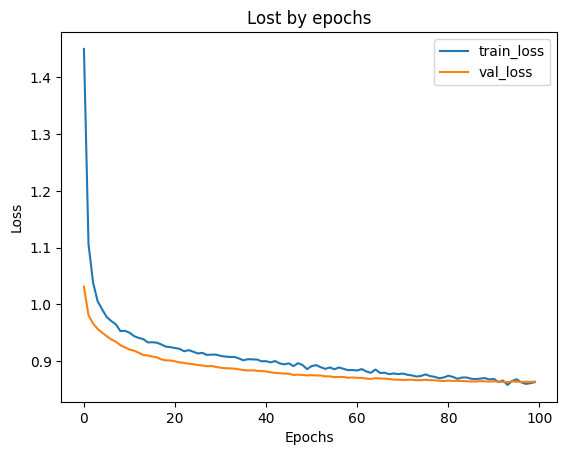

In [169]:
model_fullyconnected_02.show_evolution_loss()

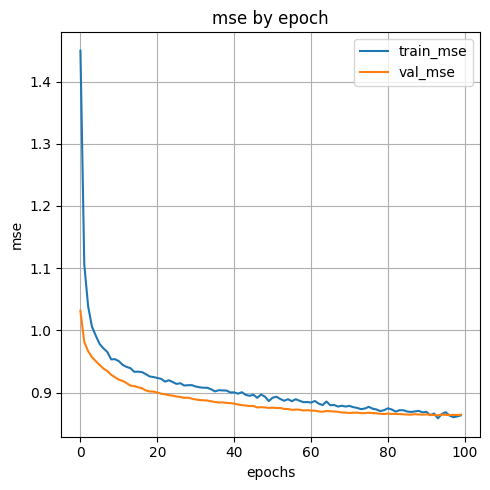

In [170]:
model_fullyconnected_02.show_evolution_metric((5,5))

In [171]:
y_newspopularity_pred_transformed, _ = model_fullyconnected_02.predict(X_pred = X_newspopularity_test_transformed, classification_type = None)
y_newspopularity_pred = target_scaler.inverse_transform(y_newspopularity_pred_transformed)

362/362 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [172]:
df_fullyconnected_results = model_evaluation_regressor(y_newspopularity_test, y_newspopularity_pred, model_name = "fullyconnected")
df_fullyconnected_results

MAE         RMSE        R2
Model                                            
fullyconnected  761.574768  1027.536252  0.125689

## Actividad 10

Implementa y entrena un modelo Extreme Gradient Boosting, usando búsqueda de grilla con 5 fold. Para ello considera:

- n_estimators: [100, 120, 150, 200, 300]
- learning_rate: [0.008, 0.07, 0.009, 0.01, 0.02]
- subsample: np.linspace(0.05, 1, 5)
- scale_pos_weight: np.linspace(0.8, 0.9, 2)

Muestra los mejores hiper parámetros encontrados, calcula y muestra gráficamente la importancia de las características para la predicción en el modelo. Calcula las mismas métricas usadas en el modelo anterior, sobre el conjunto de test, para evaluar el modelo.

In [153]:
# Modelo base XGBRegressor
xgb_reg = XGBRegressor(
    objective="reg:squarederror",
    random_state=42
)

# Definir la grilla de hiperparámetros
param_grid_xgb_reg = {
    'n_estimators': [100, 120, 150, 200, 300],
    'learning_rate': [0.008, 0.07, 0.009, 0.01, 0.02],
    'subsample': np.linspace(0.05, 1, 5),
    'scale_pos_weight': np.linspace(0.8, 0.9, 2)
}

# Configurar la búsqueda por grilla (GridSearchCV)
grid_xgb_reg = GridSearchCV(
    estimator = xgb_reg,
    param_grid = param_grid_xgb_reg,
    scoring = 'r2',         # métrica a optimizar
    cv = 5,               # validación cruzada
    n_jobs = -1,            # usa todos los núcleos disponibles
    verbose = 0
)

# Entrenar el modelo con búsqueda de hiperparámetros
grid_xgb_reg.fit(X_newspopularity_train, y_newspopularity_train)

# Mejor modelo encontrado
best_xgb_reg = grid_xgb_reg.best_estimator_

# Predicciones
y_pred_best_xgb_reg = best_xgb_reg.predict(X_newspopularity_test)

# Mejores parametros
best_params_xgb_reg = grid_xgb_reg.best_params_

In [280]:
best_params_xgb_reg

{'learning_rate': 0.02,
 'n_estimators': 300,
 'scale_pos_weight': np.float64(0.8),
 'subsample': np.float64(0.525)}

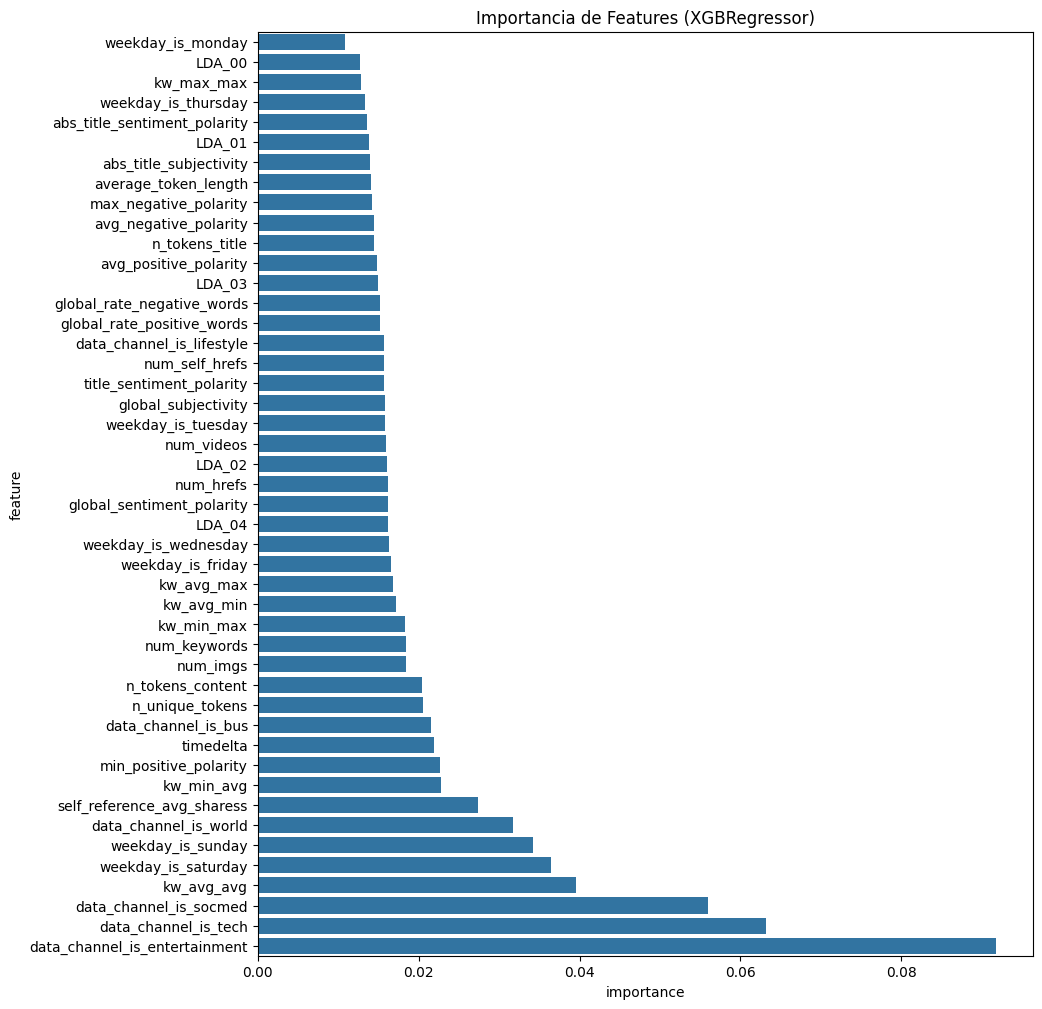

In [277]:
# Importancia de características según modelo: best_xgb_reg

importancias = best_xgb_reg.feature_importances_

df_imp = pd.DataFrame({
    'feature': X_features_sorted,
    'importance': importancias
}).sort_values('importance')

plt.figure(figsize=(10, 12))
sns.barplot(data=df_imp, x='importance', y='feature')
plt.title("Importancia de Features (XGBRegressor)")
plt.show()

In [281]:
df_xgb_reg_results = model_evaluation_regressor(y_newspopularity_test, y_pred_best_xgb_reg, model_name = "xgb_reg")
df_xgb_reg_results

MAE         RMSE        R2
Model                                     
xgb_reg  749.192139  1012.740311  0.150687

## Actividad 11

Construye un modelo de Bagging usando al menos tres modelos heterogéneos. Para ello utiliza la siguiente función (utilizando el archivo entregado).
Calcula las mismas métricas usadas en el modelo anterior, sobre el conjunto de test, para evaluar el modelo. Muestra en un DataFrame los resultados de todos los modelos y concluye.

In [260]:
# Generamos los modelos

# ElasticNet
elastic_reg = ElasticNet()

# DecisionTreeRegressor
dtr_reg = DecisionTreeRegressor()

# Lasso
lasso_reg = Lasso()

estimators = [elastic_reg, dtr_reg, lasso_reg, dtr_reg, dtr_reg, dtr_reg, lasso_reg]
T = 100


In [239]:
def bagging_het(X_train, y_train, T, estimators, X_test):
    
    """
    Bagging heterogéneo para REGRESIÓN usando arrays.
    """
 
    n_train = X_train.shape[0]
    n_test  = X_test.shape[0]

    trained_model = []
    yhat_test = np.zeros((n_test, T))
    idx_oob = []

    for t in range(T):

        # Sample con reemplazo de índices
        idx_boot = np.random.choice(n_train, size=n_train, replace=True)

        # Muestra bootstrap
        sa1 = X_train[idx_boot]
        sa1_y = y_train[idx_boot]

        # Observaciones out-of-bag (para visualizar o CV)
        idx_oob_batch = list(set(range(n_train)) - set(idx_boot))
        idx_oob = list(set(idx_oob + idx_oob_batch))
        
        # Selección aleatoria de un estimador
        idx_estimator = np.random.randint(0, len(estimators))
        base_estimator = estimators[idx_estimator]
        
        # Clonar modelo (muy importante para no reutilizar el mismo)
        estimator = clone(base_estimator)

        # Entrenar
        estimator.fit(sa1, sa1_y)
        trained_model.append(estimator)

        # Predecir sobre test
        yhat_test[:,t] = estimator.predict(X_test)

    # PROMEDIO para regresión 
    yhat_out = pd.Series(data=np.mean(yhat_test, axis=1), name='yhat')
        
    return trained_model, yhat_test, yhat_out, idx_oob


def bagging_het_predict_reg(X, estimators):
    """
    Predicción final para regresión (promedio).
    """

    yhat = np.zeros((X.shape[0], len(estimators)))

    for i, est in enumerate(estimators):
        yhat[:,i] = est.predict(X)

    # PROMEDIO para regresión
    return pd.Series(data=np.mean(yhat, axis=1), name='yhat')


In [261]:
trained_model_bagging, y_bag_pred_mat, y_bag_pred_transformed, idx_oob_bagging = bagging_het(X_newspopularity_train_transformed, 
                                                                                 y_newspopularity_train_transformed, 
                                                                                 T, 
                                                                                 estimators, 
                                                                                 X_newspopularity_test_transformed)

In [262]:
y_bag_pred = target_scaler.inverse_transform(y_bag_pred_transformed.to_numpy().reshape(-1,1))

In [263]:
df_bag_reg_results = model_evaluation_regressor(y_newspopularity_test, y_bag_pred, model_name = "bag_reg")
df_bag_reg_results

MAE         RMSE        R2
Model                                     
bag_reg  785.920858  1034.937031  0.113049

In [282]:
# Comparacion de metricas segun modelo

df_results_reg = pd.concat([df_rf_reg_results, df_fullyconnected_results, df_xgb_reg_results, df_bag_reg_results])
df_results_reg

MAE         RMSE        R2
Model                                            
rf_reg          761.252326  1019.310672  0.139631
fullyconnected  761.574768  1027.536252  0.125689
xgb_reg         749.192139  1012.740311  0.150687
bag_reg         785.920858  1034.937031  0.113049

In [283]:
# Comparacion de valores predichos de y
df_y_newspopularity_test_comparation = pd.DataFrame(
    {
        "y_test": y_newspopularity_test.ravel(),
        "y_pred_rf_reg": y_pred_best_rf_reg.ravel(),
        "y_pred_fullyconnected": y_newspopularity_pred.ravel(),
        "y_pred_xgb_reg": y_pred_best_xgb_reg.ravel(),
        "y_pred_bag_reg": y_bag_pred.ravel()
    }
)

df_y_newspopularity_test_comparation

y_test  y_pred_rf_reg  y_pred_fullyconnected  y_pred_xgb_reg  \
0        5200    2158.366326            2242.705566     2199.992920   
1        1300    1531.315161            1127.305420     1364.023071   
2        1100    1641.471921            1308.300171     1632.541992   
3        2400    2299.533390            2038.764648     2226.926270   
4        1000    1513.866087            1477.193237     1476.899414   
...       ...            ...                    ...             ...   
11579     833    1664.308616            1492.896118     1569.022339   
11580    2100    2208.508148            2569.128174     2612.992920   
11581     521    1459.469976            1398.472778     1409.612305   
11582    1900    2596.968548            2931.493896     2947.768555   
11583    1500    2356.495067            1931.257446     2243.736816   

       y_pred_bag_reg  
0         1858.598726  
1         1515.728726  
2         1808.428726  
3         2115.238726  
4         1603.298726  
...               ...  
11579     1799.478726  
11580     2152.868726  
11581     1502.508726  
11582     2457.498726  
11583     2292.968726  

[11584 rows x 5 columns]

In [ ]:
# Conclusiones:
# Las metricas calculadas obedecen a la naturaleza de los modelos. el mejor modelo para valores tabulares y con una cantidad de miles de datos
# resulta ser los modelos XGBoosting. Por Otro lado, las redes neuronales necesitan muchos mas datos para dar mejores resultados.